# Insurance Claim Fraud Detection

In [1]:
# import header files
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [29]:
#read dataset file using pandas
df=pd.read_csv('insurance.csv')

## Statstical analysis

In [4]:
df.shape

(1000, 40)

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [42]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'csl_1', 'csl_2'],
      dtype='object')

In [9]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### EDA,Data Cleaning

In [30]:
# check duplicate values
df.duplicated().sum() 

0

In [31]:
#checking for whitspace,na and - values
df.isin([' ','NA','-']).sum().any()

False

In [32]:
df.isin(['?']).sum().any()

True

In [33]:
# replacing ? with nan
df=df.replace('?',np.NaN)

<AxesSubplot:>

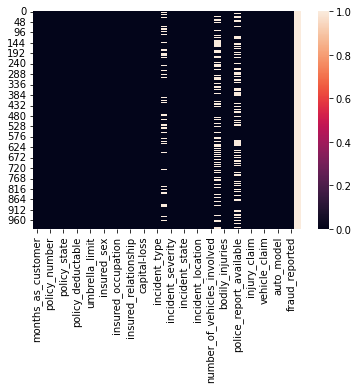

In [34]:
#heatmap for dataset
sns.heatmap(df.isnull())

In [35]:
df.isnull().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [36]:
# Droping unnecessary columns
df.drop(['_c39'],axis=1,inplace=True)

## Data Imputation

In [37]:
#data is categorical so lets use mode method
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)


In [38]:
#after imputation checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<b>No null values</b>

In [39]:
# Droping unnecessary columns
df.drop(['incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [40]:
df['csl_1']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_2']=df.policy_csl.str.split('/',expand=True)[1]

*csl is not categorical data it is a column containing 2 numerical data

*commercial insurance carriers write policies that group all damages, both property, and injury, into one level of coverage called a combined single limit (CSL) policy.

*so split the column into injury and property columns

In [41]:
#now drop csl column
df.drop("policy_csl",axis=1,inplace=True)

In [43]:
#converting date time format for object columns
#policy_bind_date
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year
#incident_date
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [44]:
#drop columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [45]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_1,csl_2,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,250,500,17,10,2014,25,1,2015
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,250,500,27,6,2006,21,1,2015
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,100,300,9,6,2000,22,2,2015
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,250,500,25,5,1990,1,10,2015
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,500,1000,6,6,2014,17,2,2015


In [46]:
df['incident_year'].unique

<bound method Series.unique of 0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: incident_year, Length: 1000, dtype: int64>

In [47]:
# Incident year for all data is 2015 lets drop it.
df.drop(['incident_year'],axis=1,inplace=True)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [ ]:
*average of people getting umberalla limit s 0
*capital gain is more
*capital loss for people is lower in rate

<AxesSubplot:>

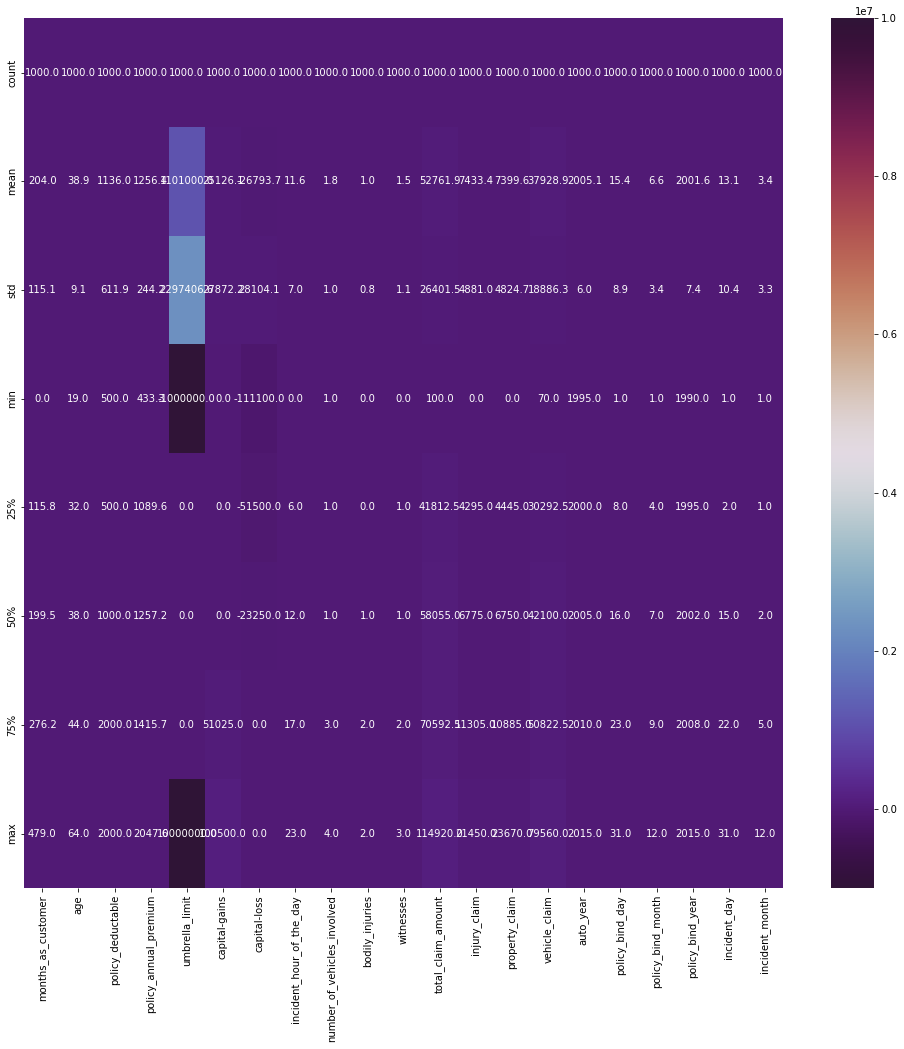

In [50]:
#describe data using heatmap
plt.figure(figsize=(17,16))
sns.heatmap(df.describe(),fmt='0.1f',annot = True,cmap='twilight_shifted')

## Seprating numerical and categorical data

In [51]:
category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
print(len(category))
category

19


['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'csl_1',
 'csl_2']

In [52]:
numerical=[]
for j in df.dtypes.index:
    if df.dtypes[j]!='object':
        numerical.append(j)
print(len(numerical))
numerical

21


['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month']

# Data Visualisation

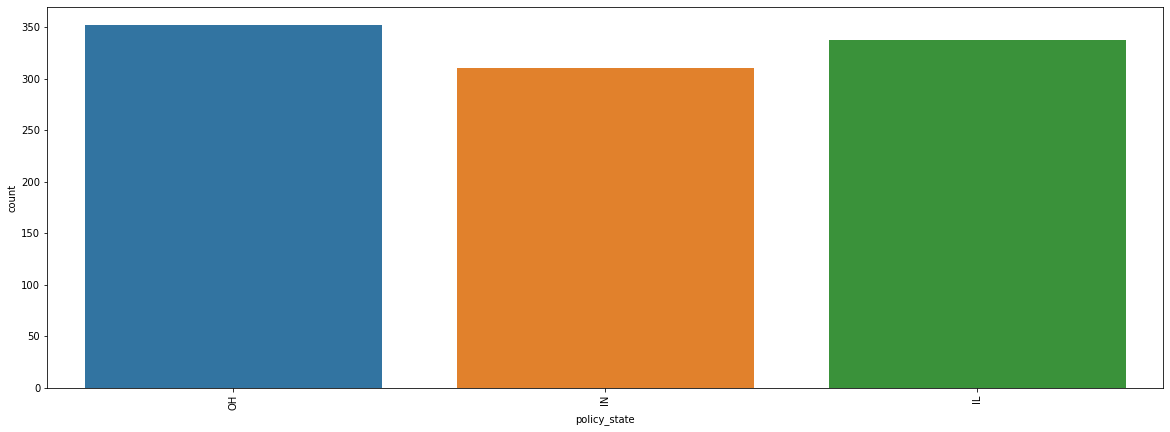

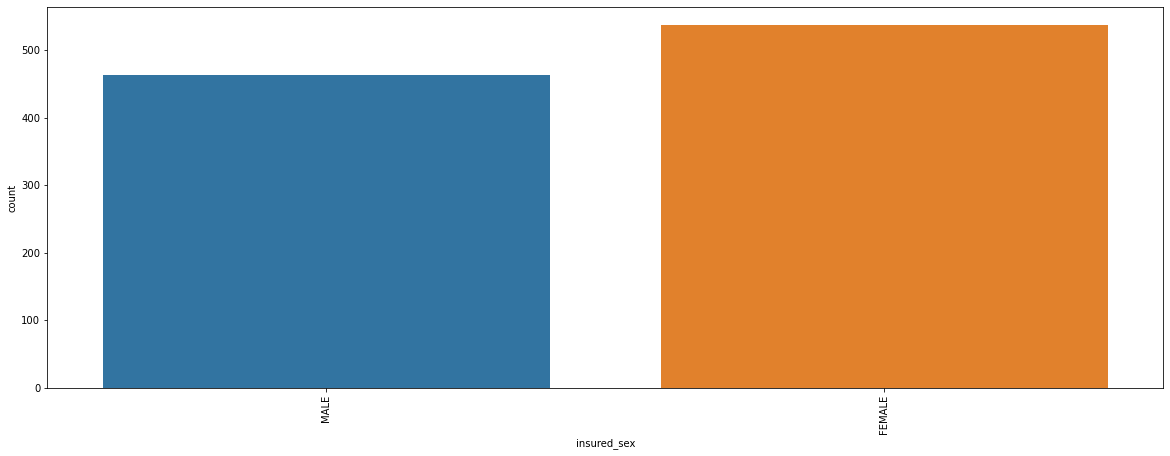

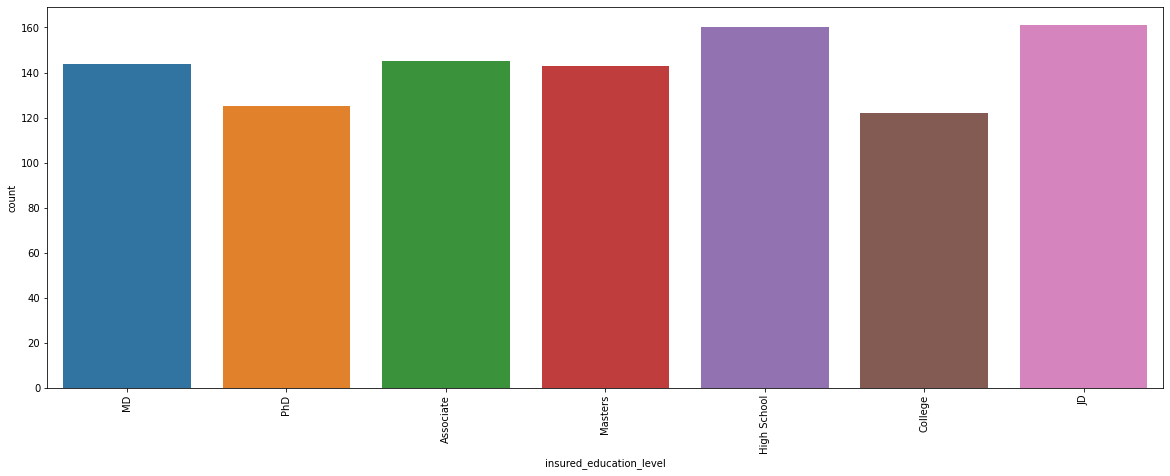

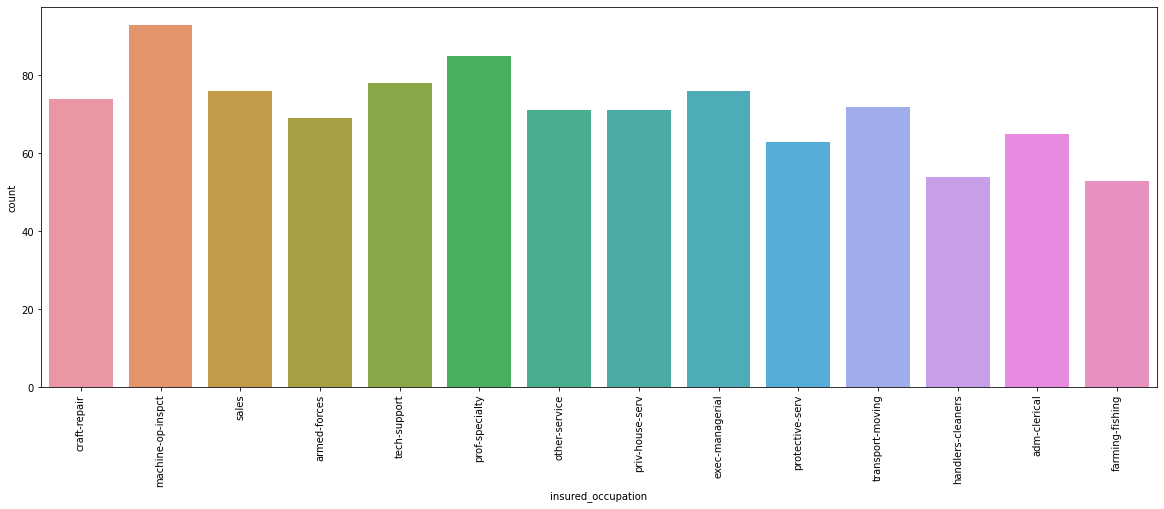

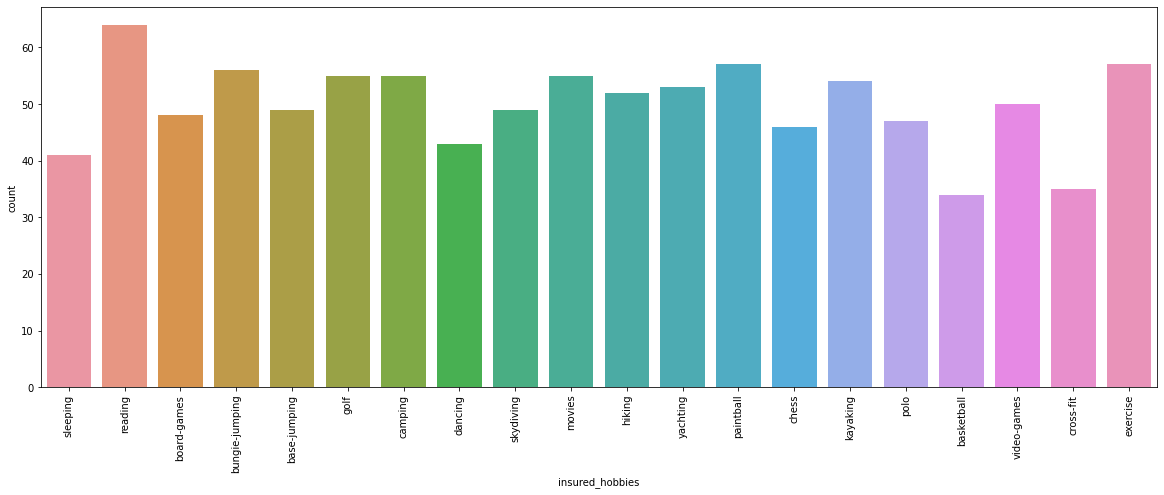

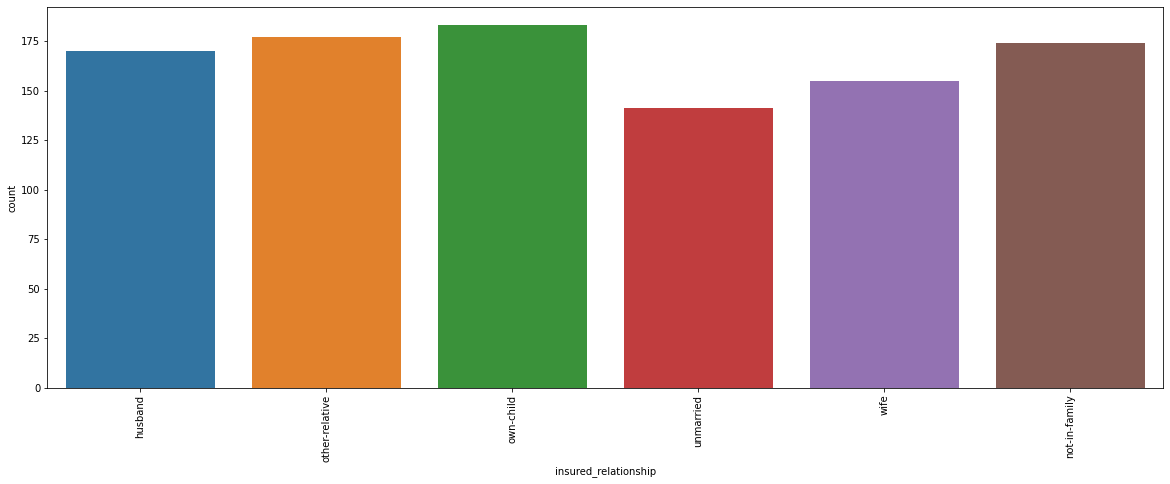

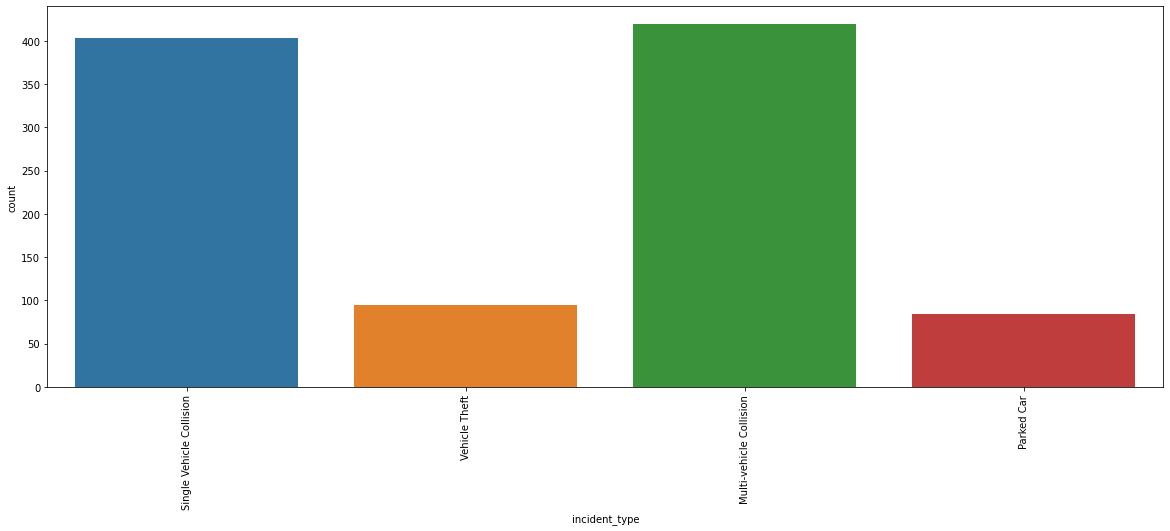

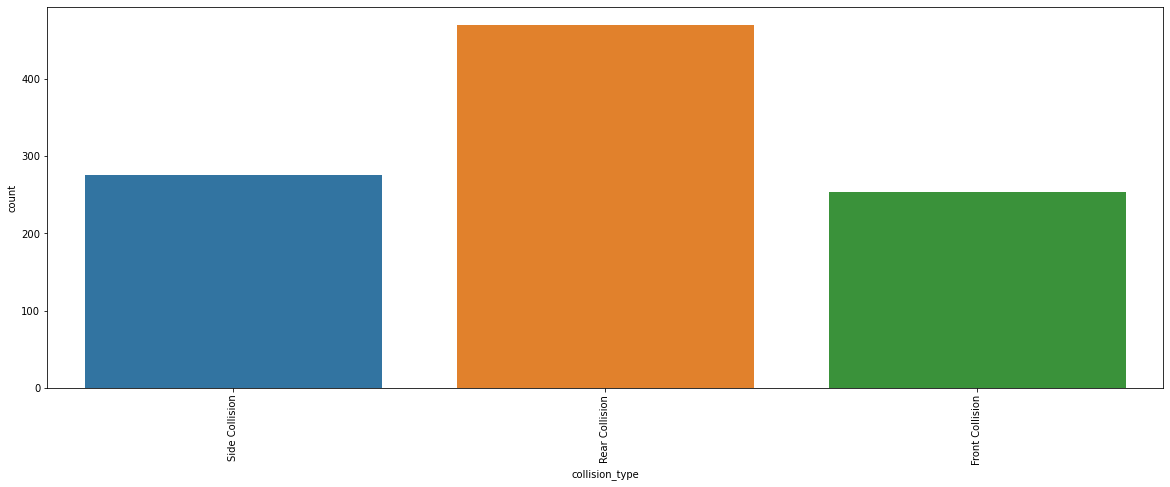

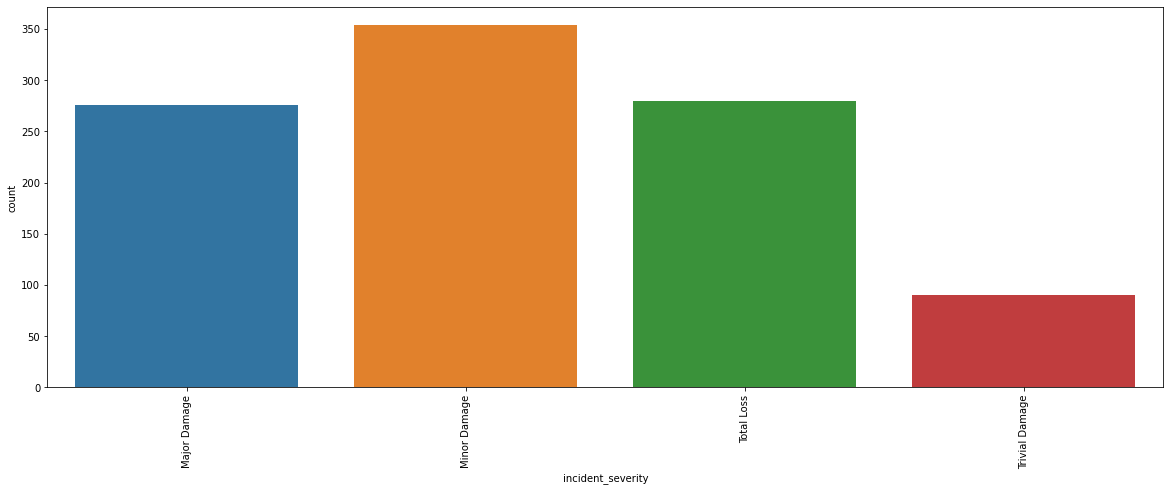

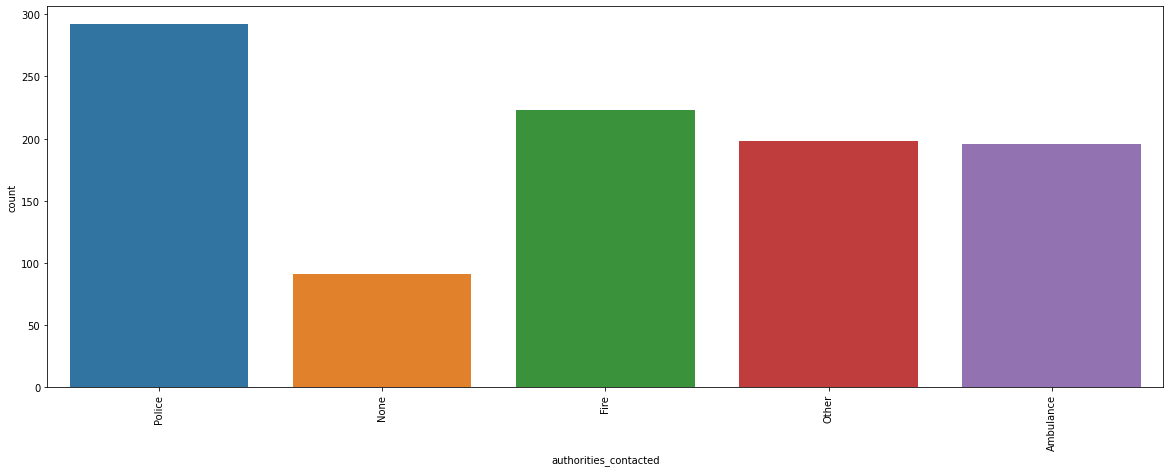

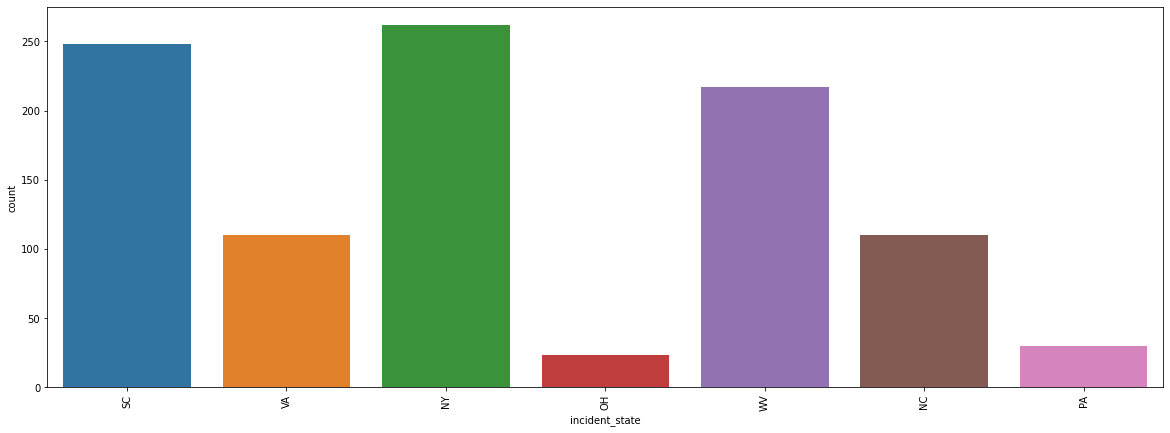

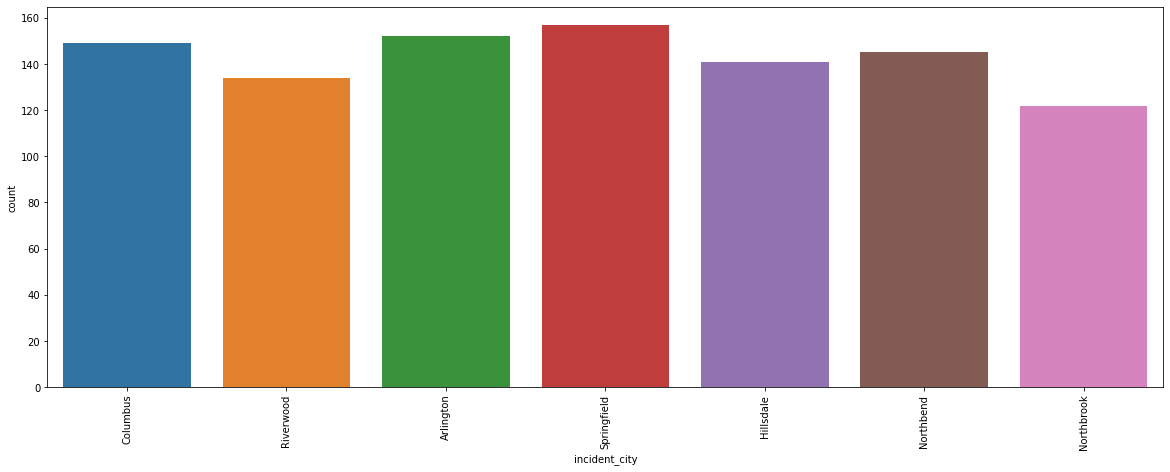

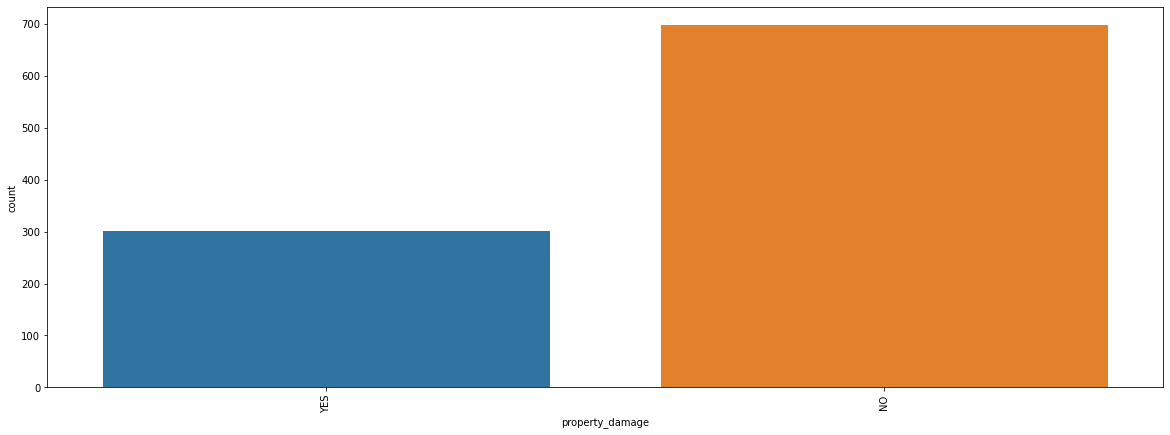

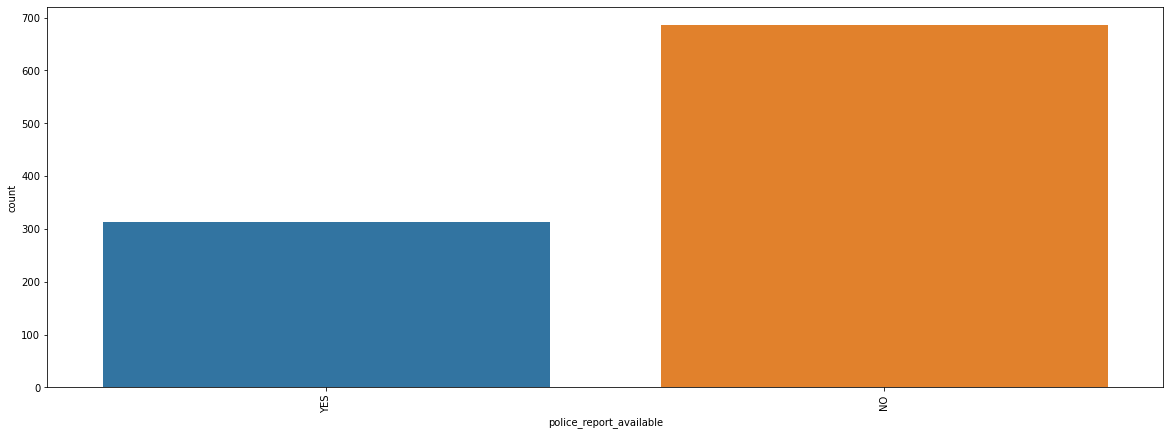

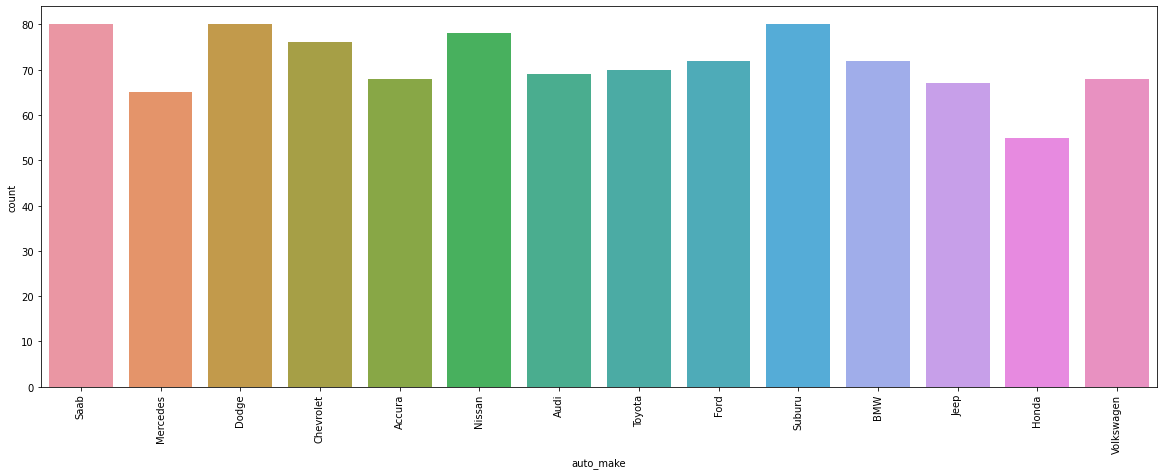

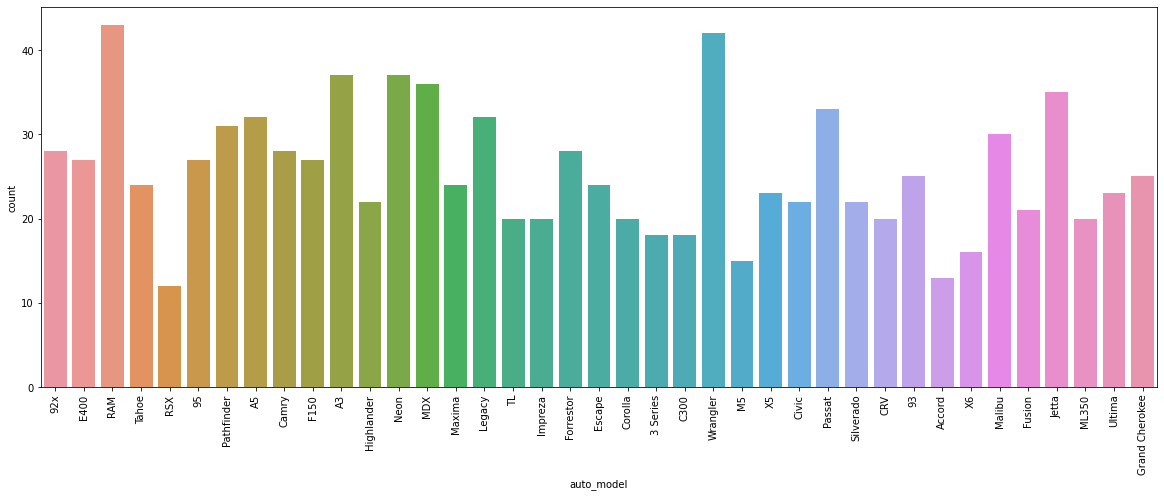

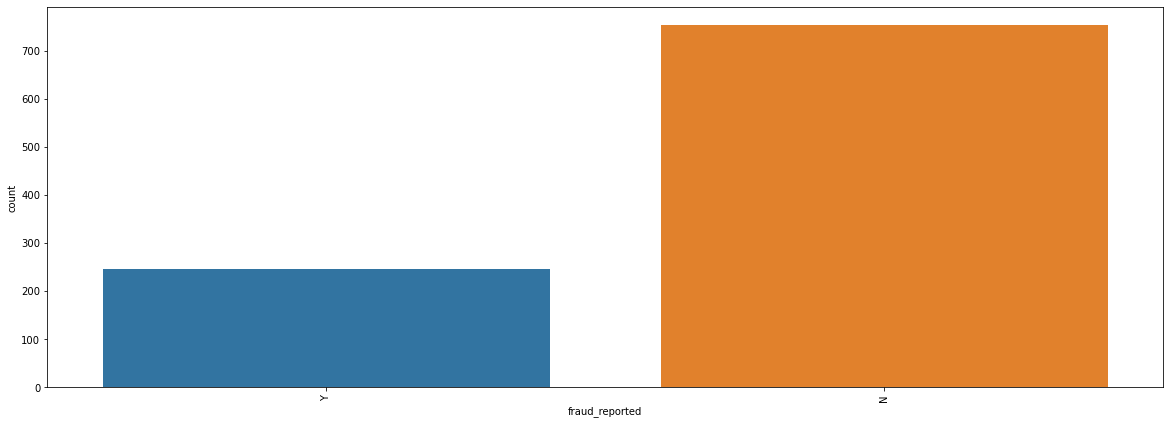

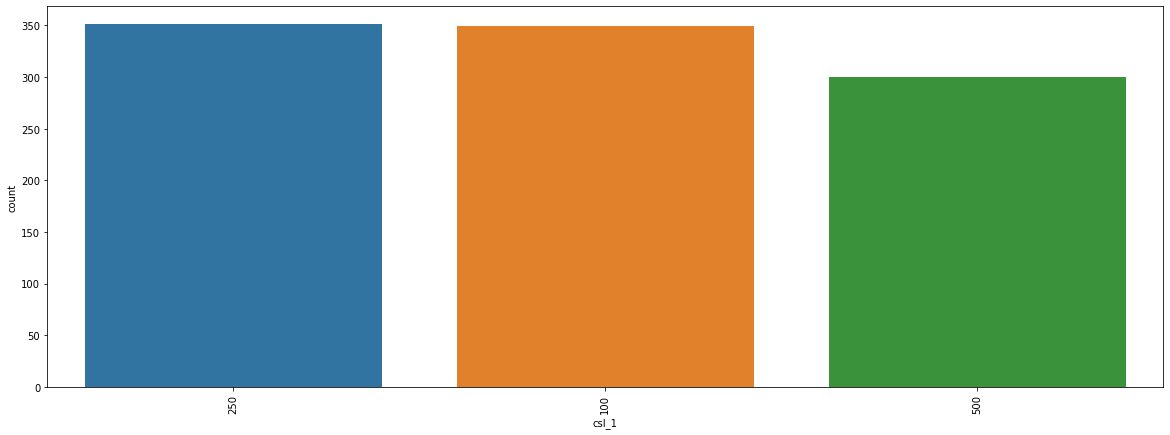

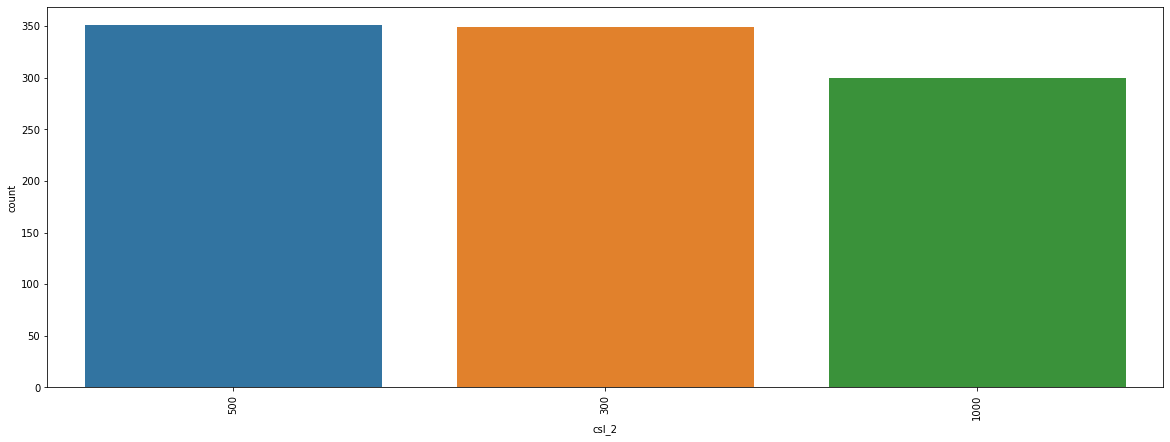

In [53]:
## univariant analysis
#for categorical data
for i in category:
    plt.figure(figsize=(20,7))
    sns.countplot(i,data=df)
    plt.xticks(rotation=90)
    plt.show()

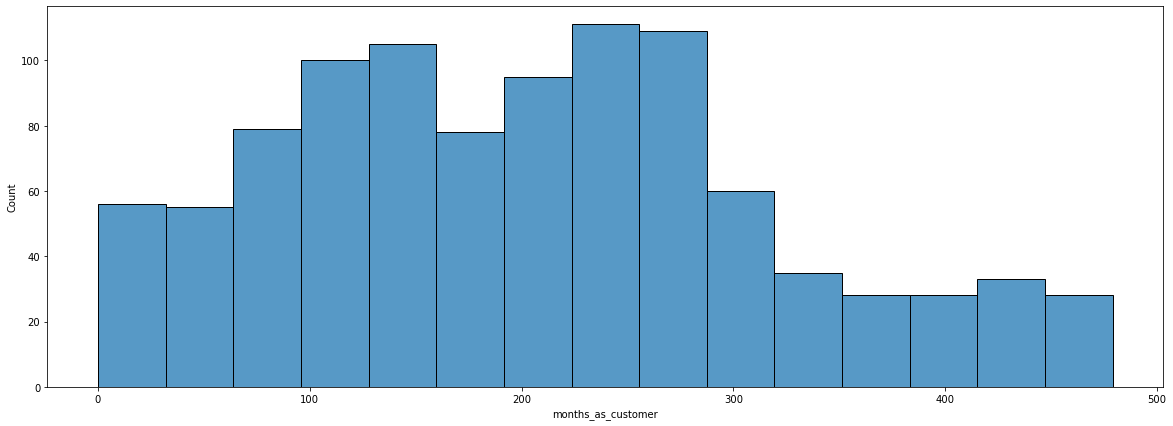

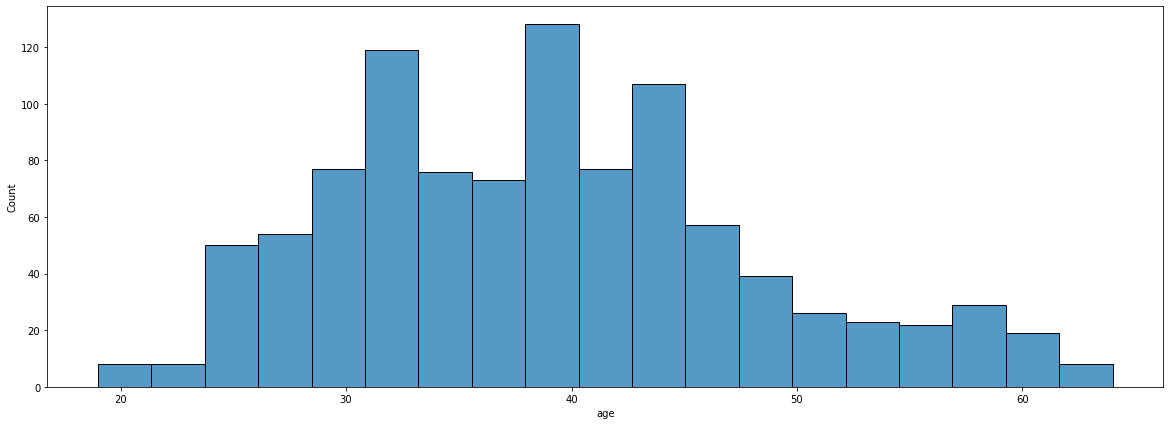

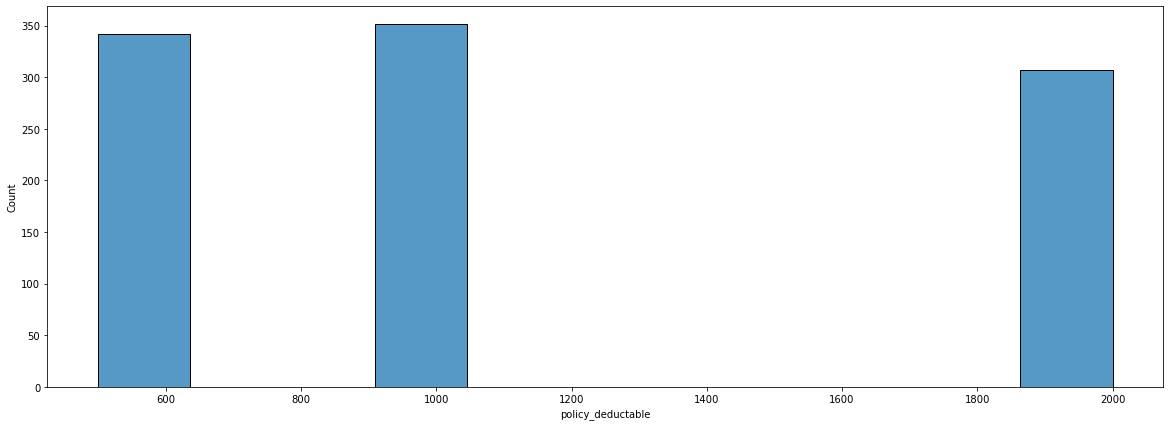

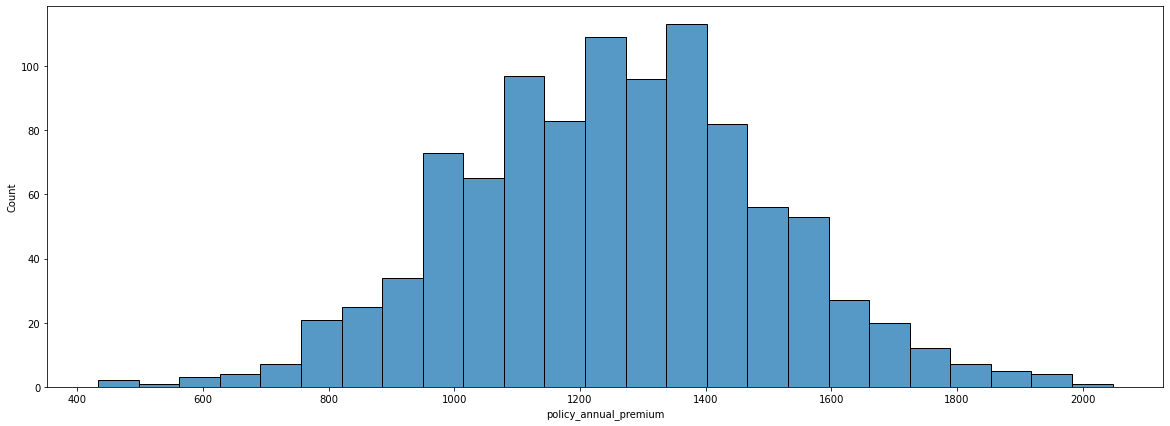

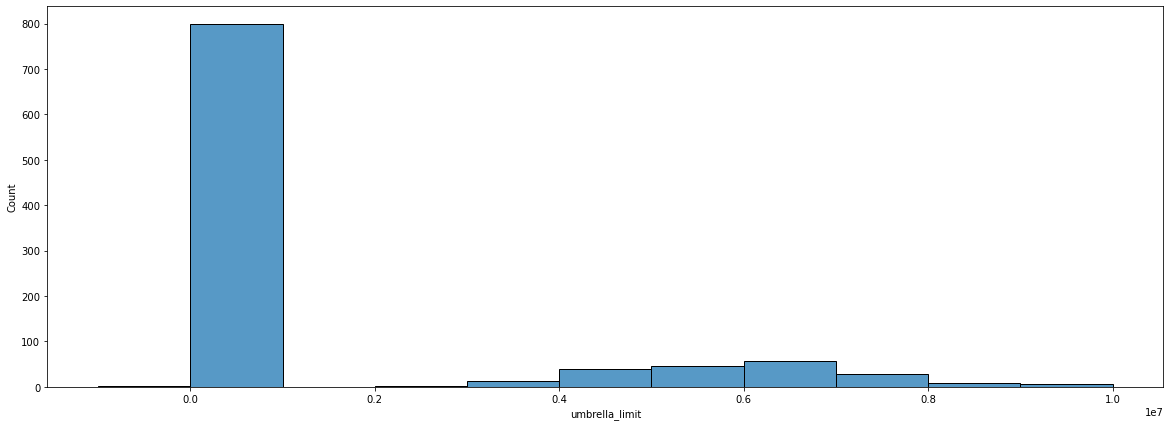

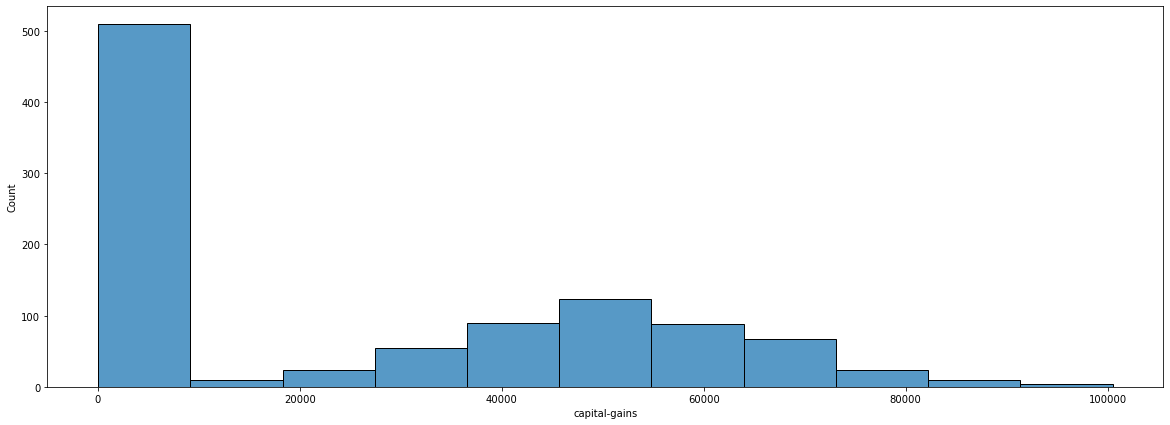

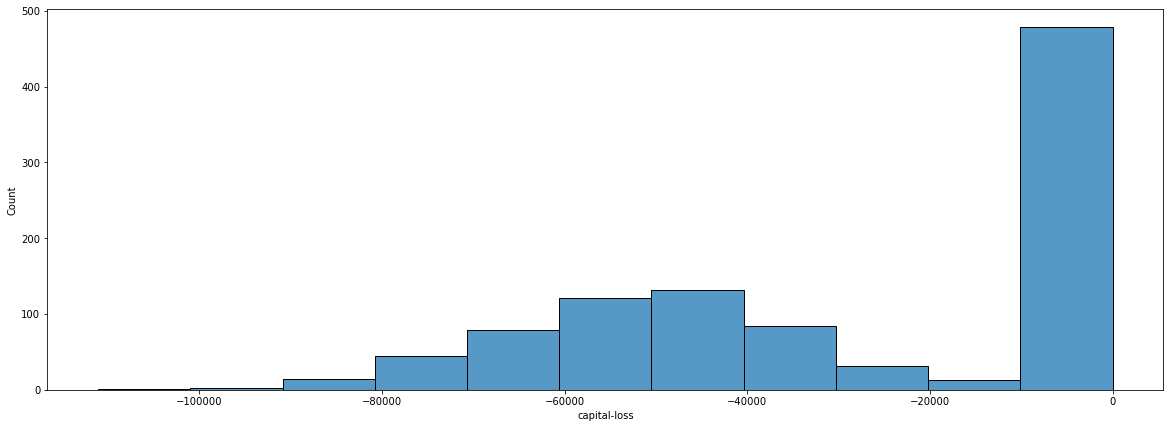

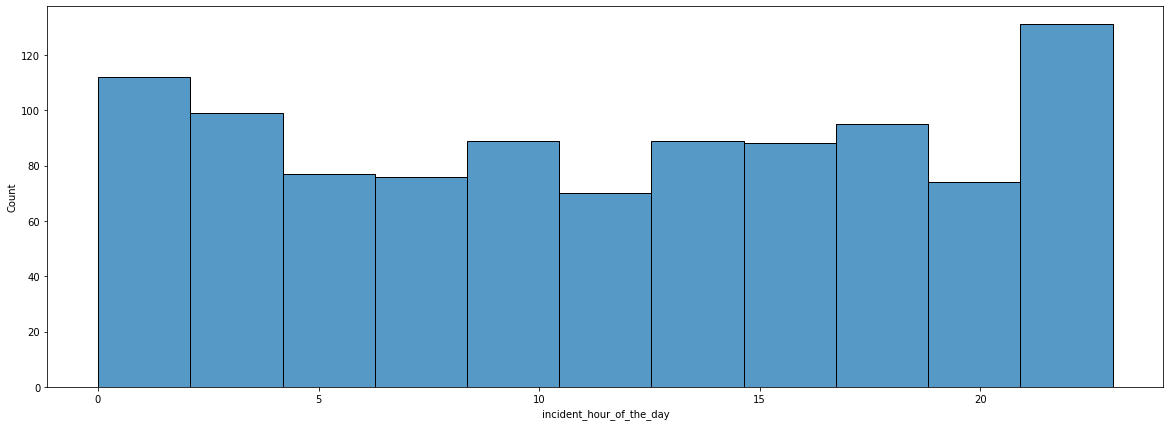

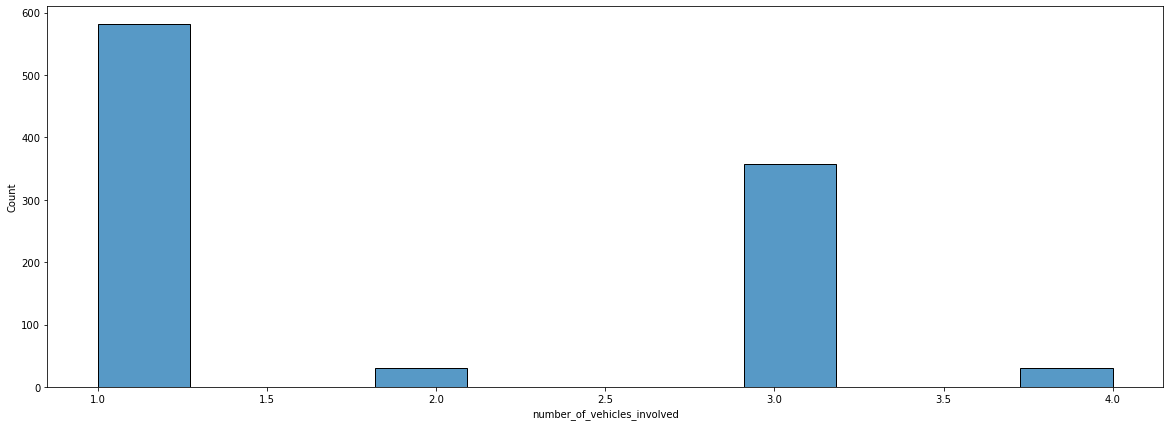

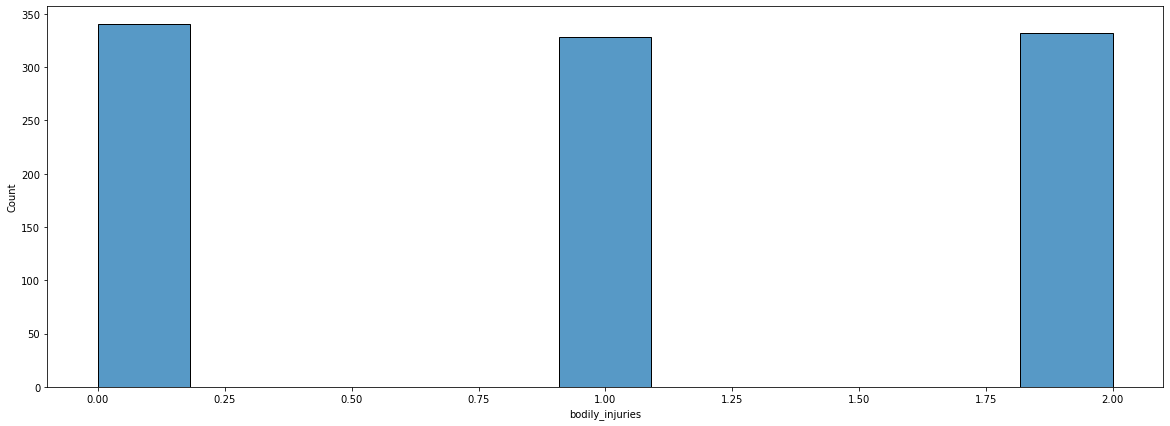

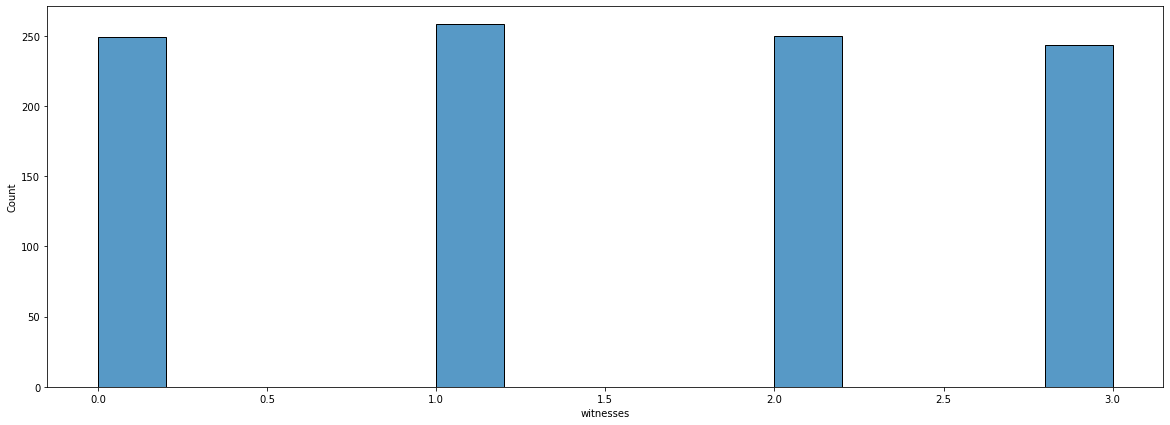

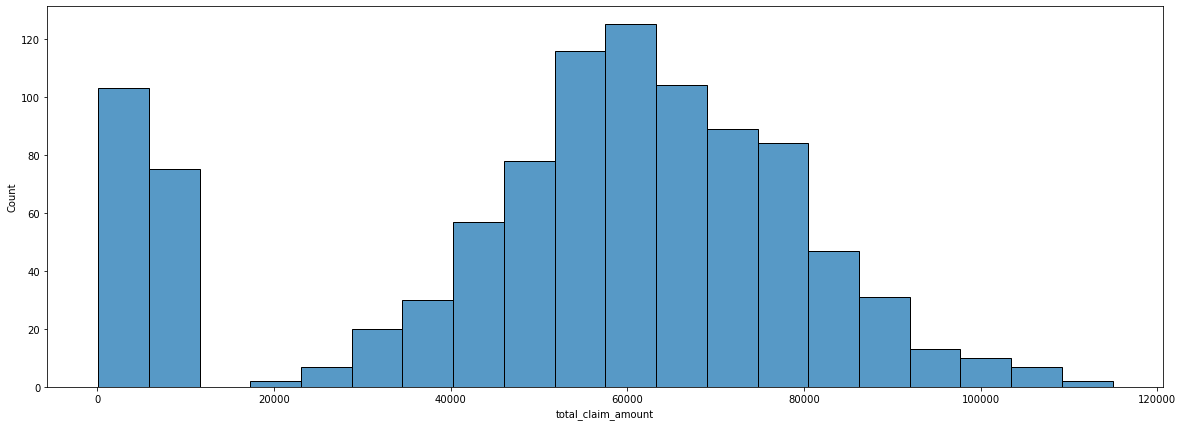

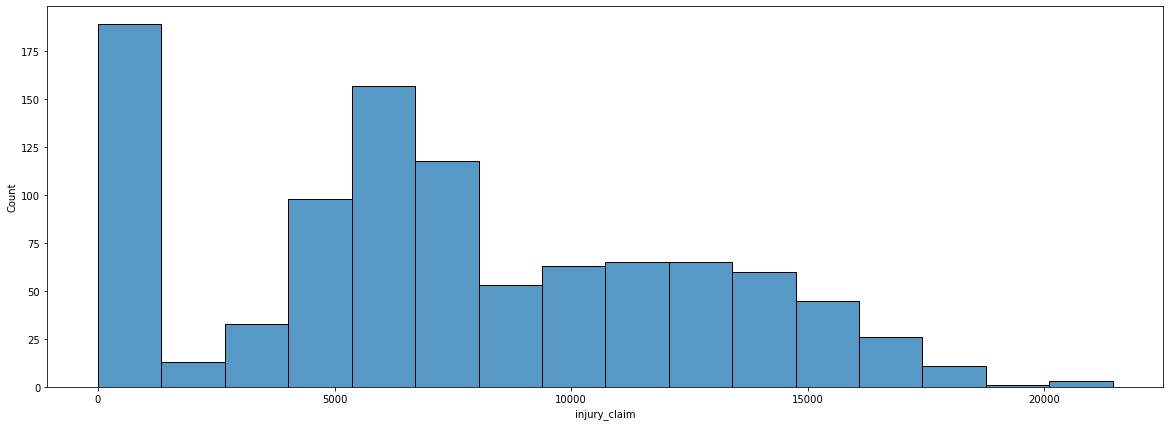

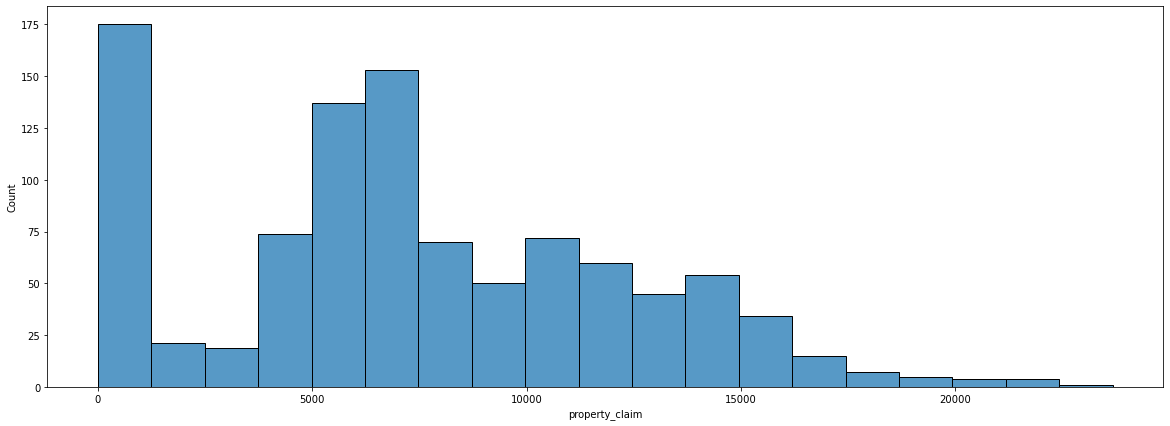

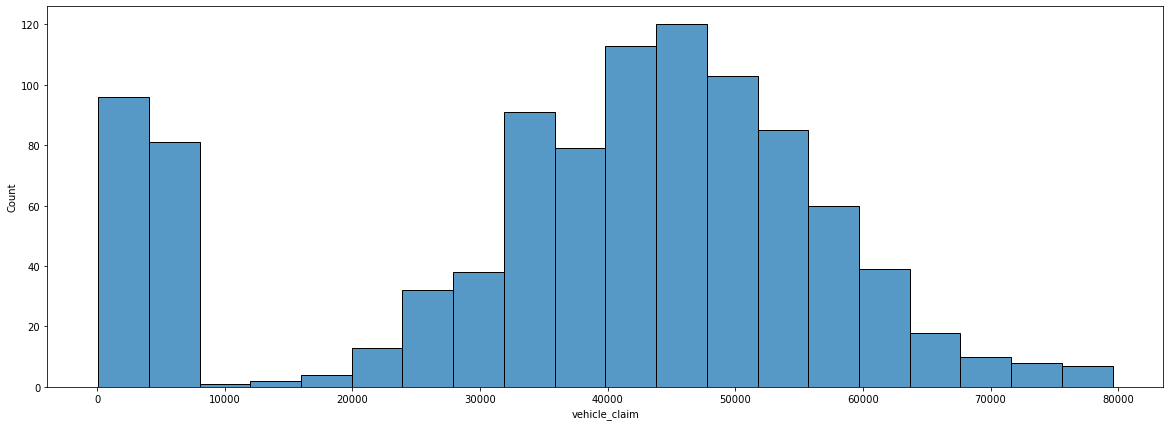

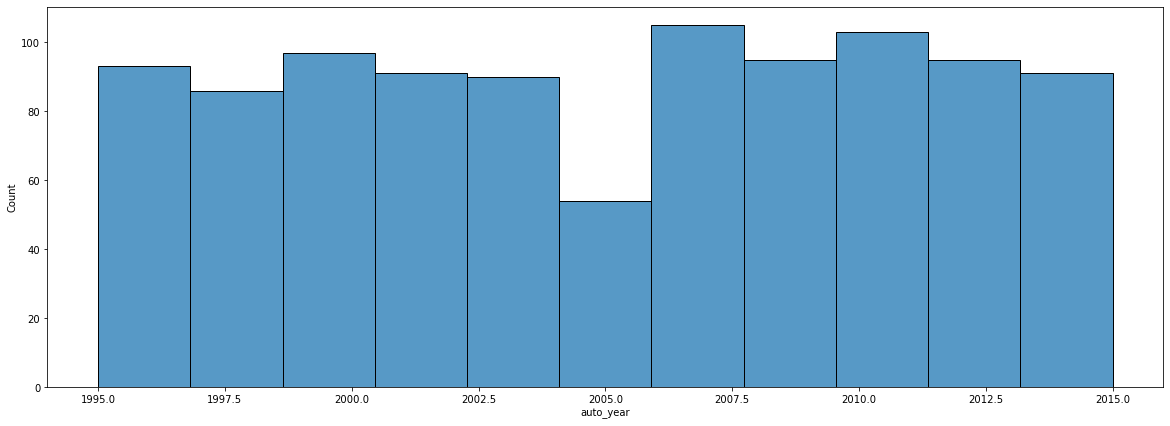

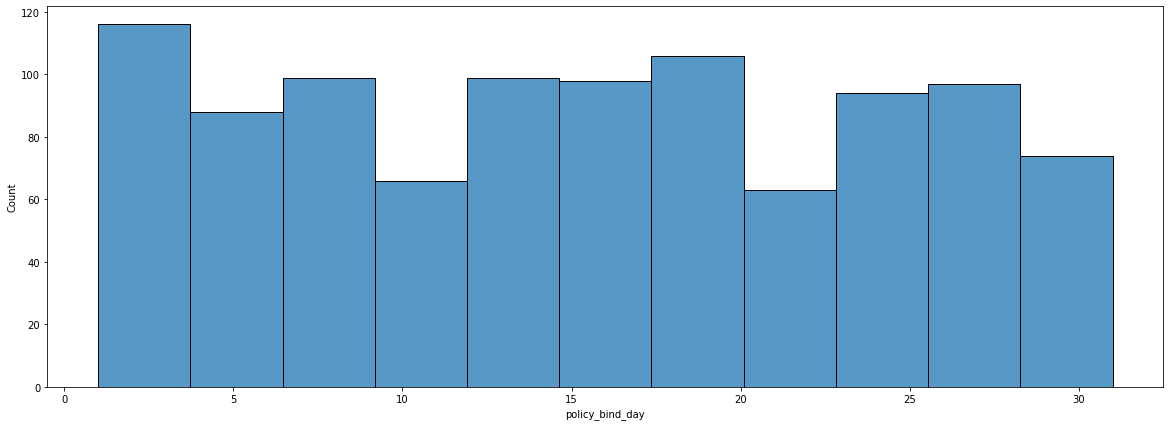

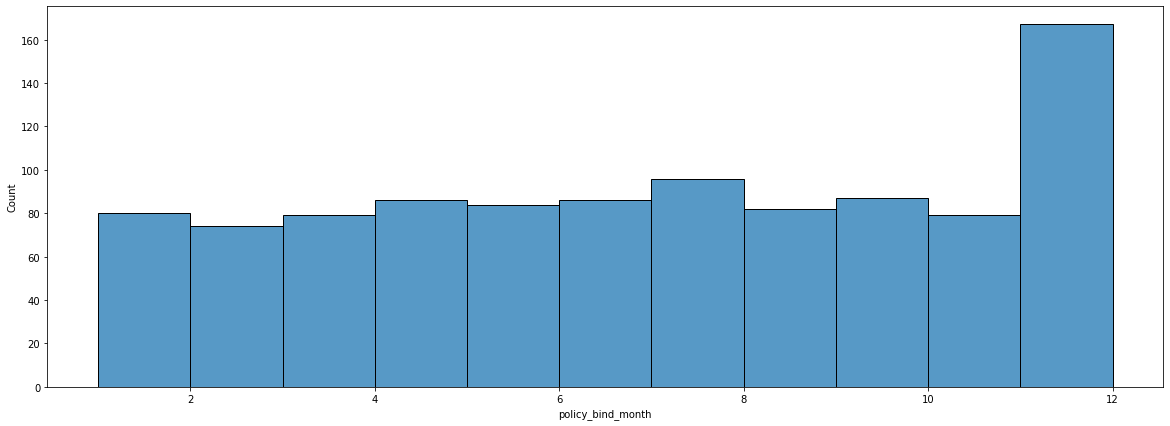

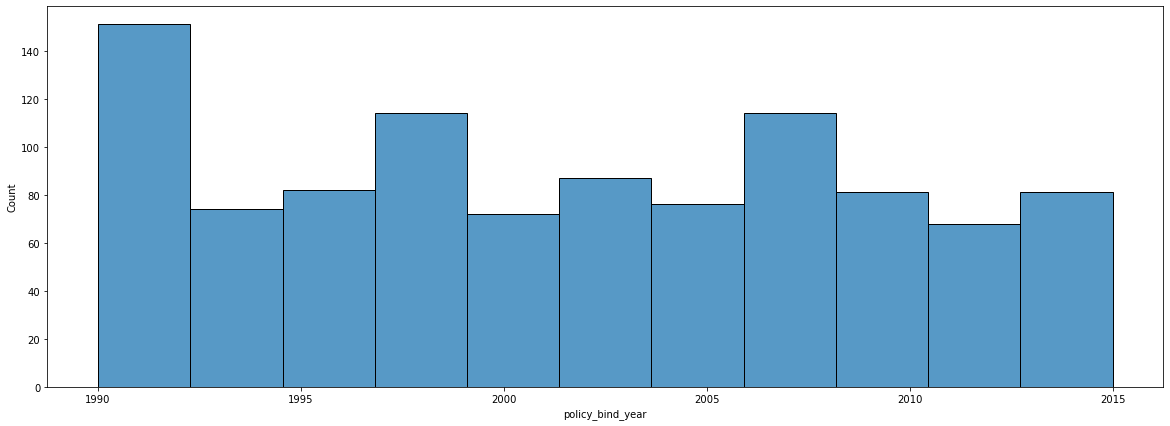

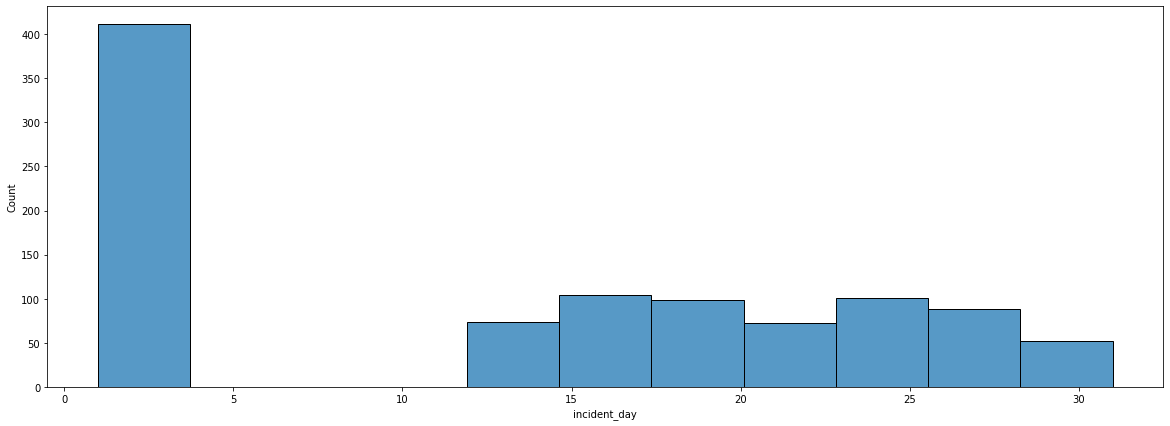

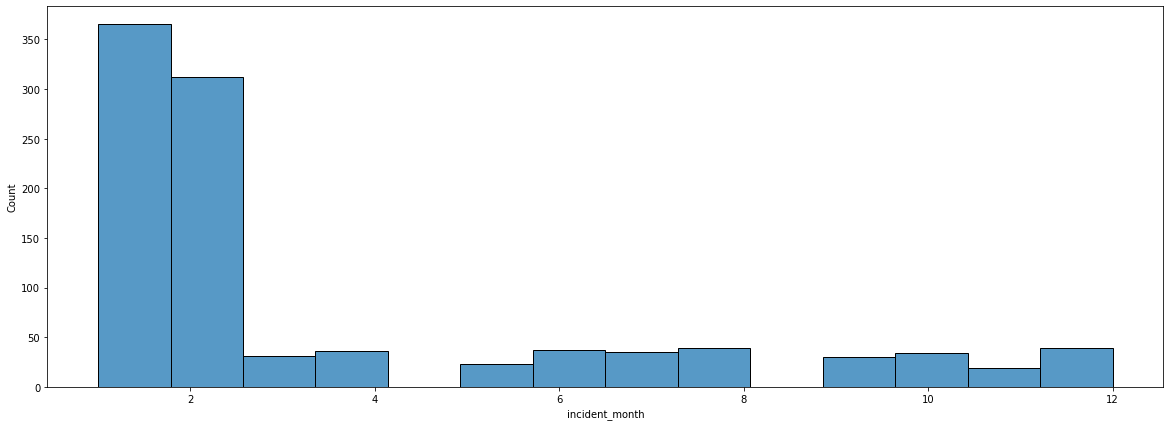

In [54]:
#plot on numerical data
for i in numerical:
    plt.figure(figsize=(20,7))
    sns.histplot(x=i,data=df)
    plt.show()

## Bivariant analysis

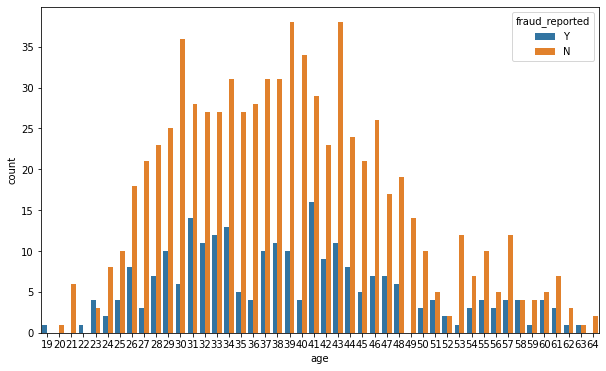

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age, hue=df.fraud_reported)
plt.show()

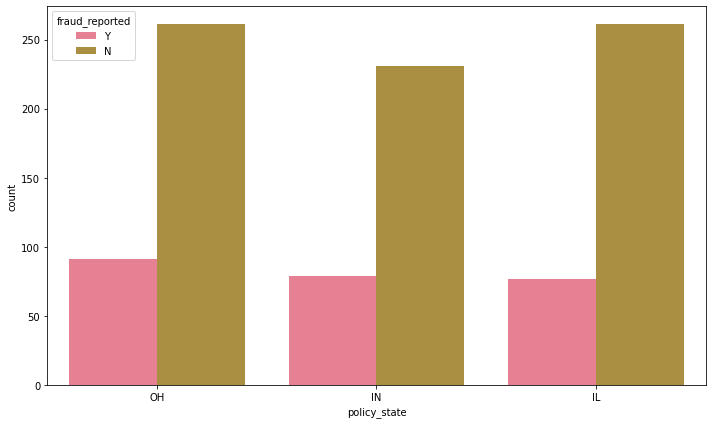

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.policy_state, hue=df.fraud_reported)
plt.show()

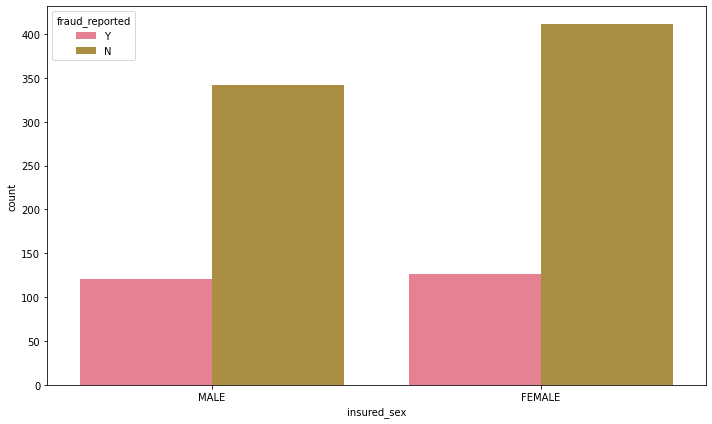

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.insured_sex, hue=df.fraud_reported)
plt.show()

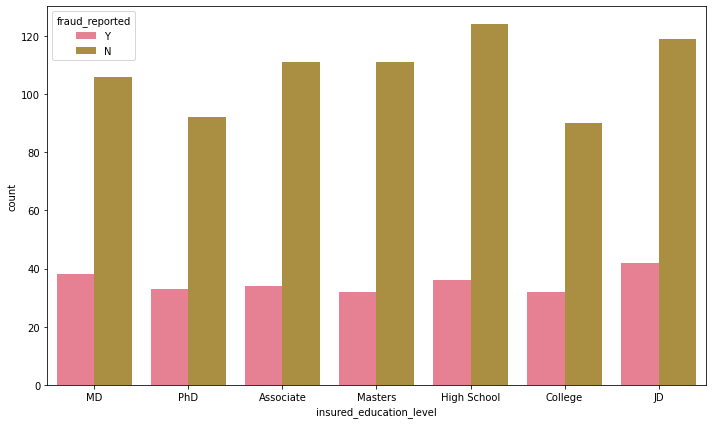

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.insured_education_level, hue=df.fraud_reported)
plt.show()

In [65]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'csl_1', 'csl_2', 'policy_bind_day',
       'policy_bind_month', 'policy_bind_year', 'incident_day',
       'incident_month'],
      dtype='object')

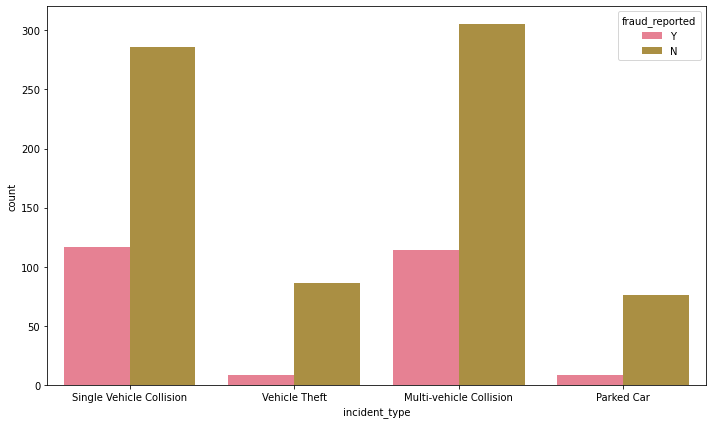

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.incident_type, hue=df.fraud_reported)
plt.show()

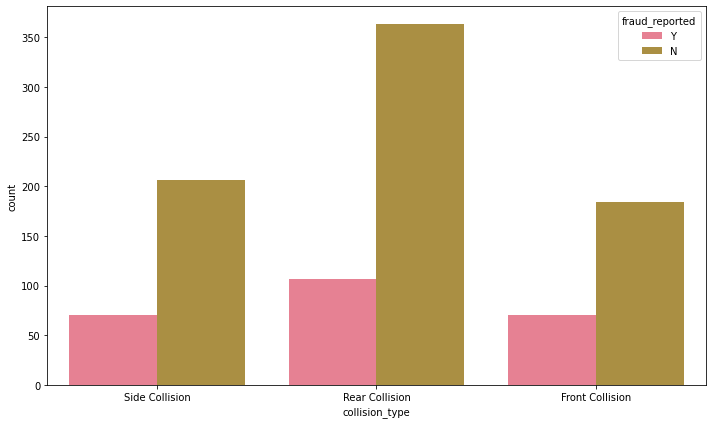

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.collision_type, hue=df.fraud_reported)
plt.show()

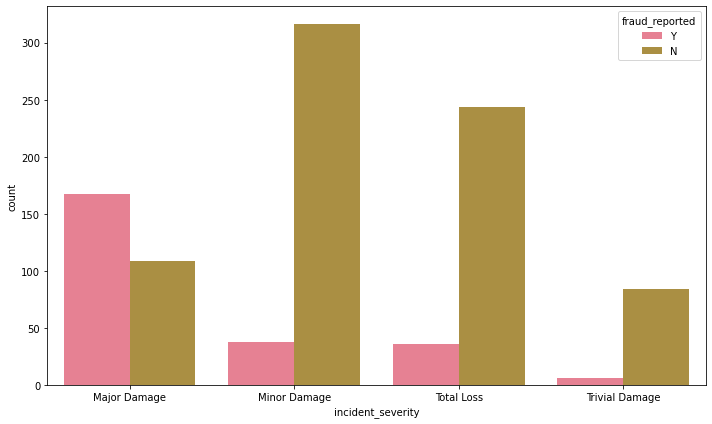

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.incident_severity, hue=df.fraud_reported)
plt.show()

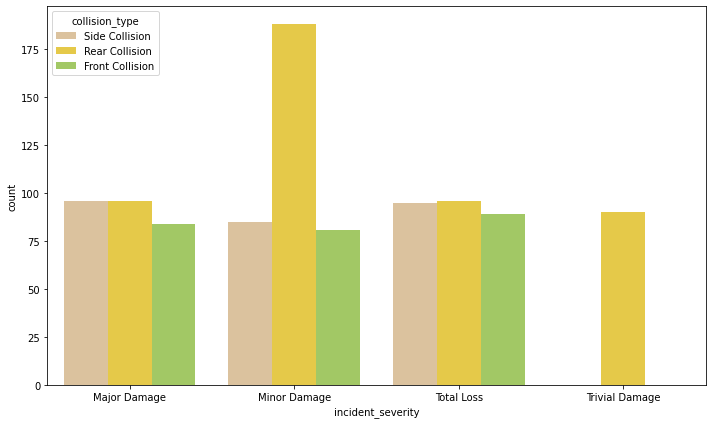

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.incident_severity, hue=df.collision_type)
plt.show()

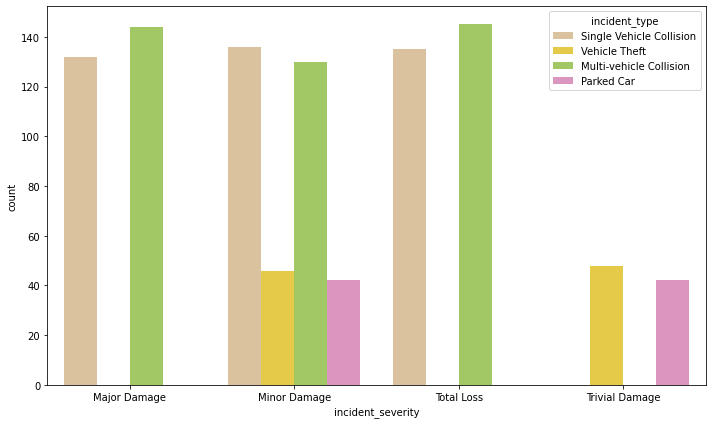

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.incident_severity, hue=df.incident_type)
plt.show()

<b>We see that more fraudlent happen in single and mutlivechile collision with major and total loss damage.</b>

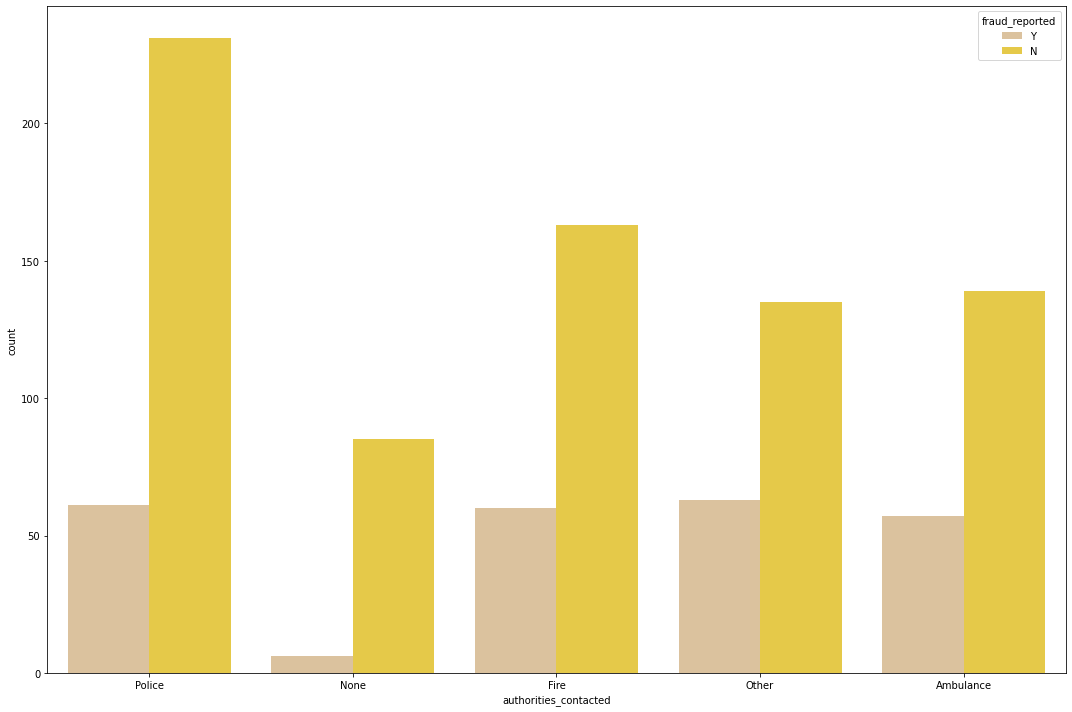

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['authorities_contacted'],hue=df['fraud_reported'])
plt.show()

In [ ]:
## Multivariant analysis

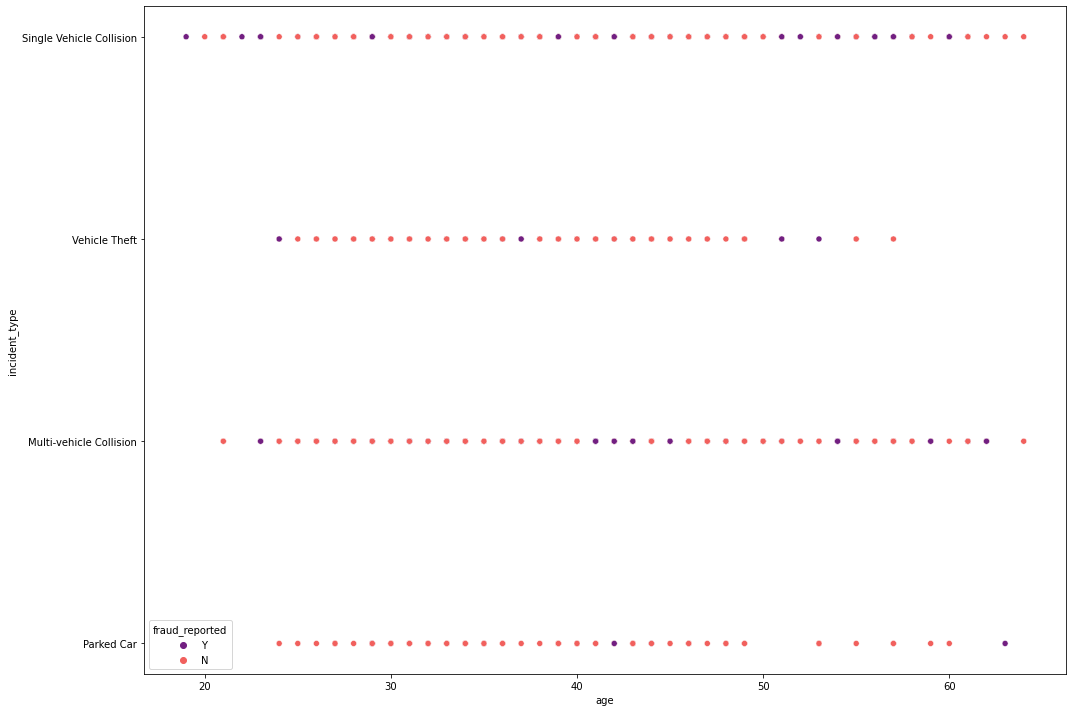

In [82]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['age'],y = df['incident_type'],hue=df['fraud_reported'],palette = 'magma')
plt.show()

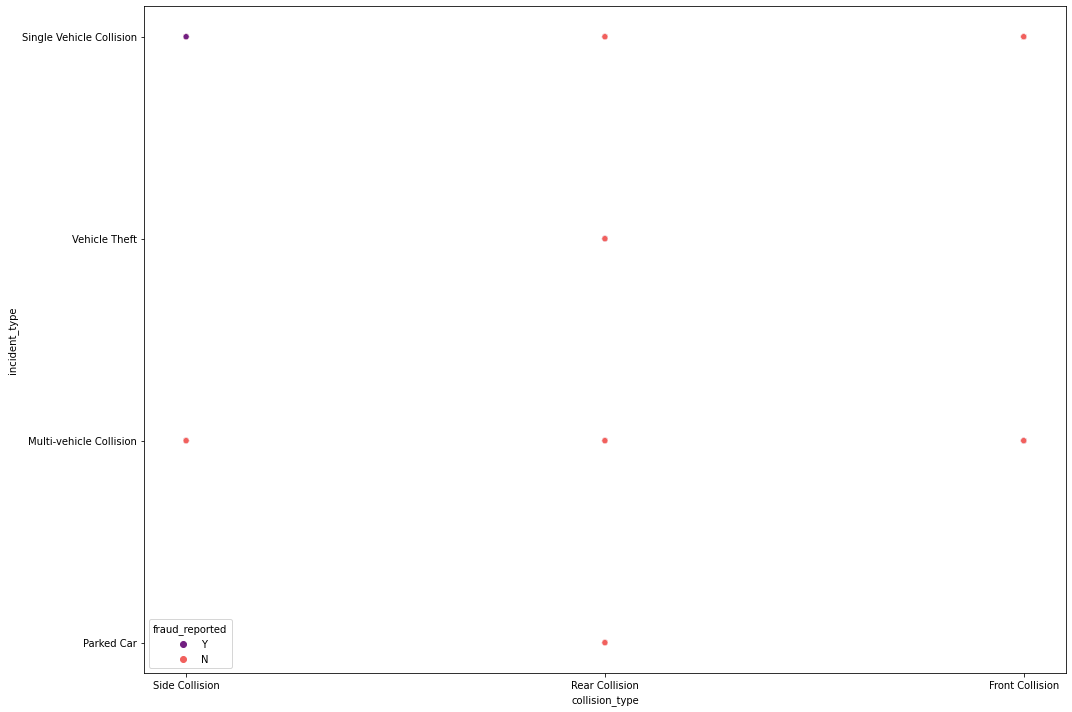

In [83]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['collision_type'],y = df['incident_type'],hue=df['fraud_reported'],palette = 'magma')
plt.show()

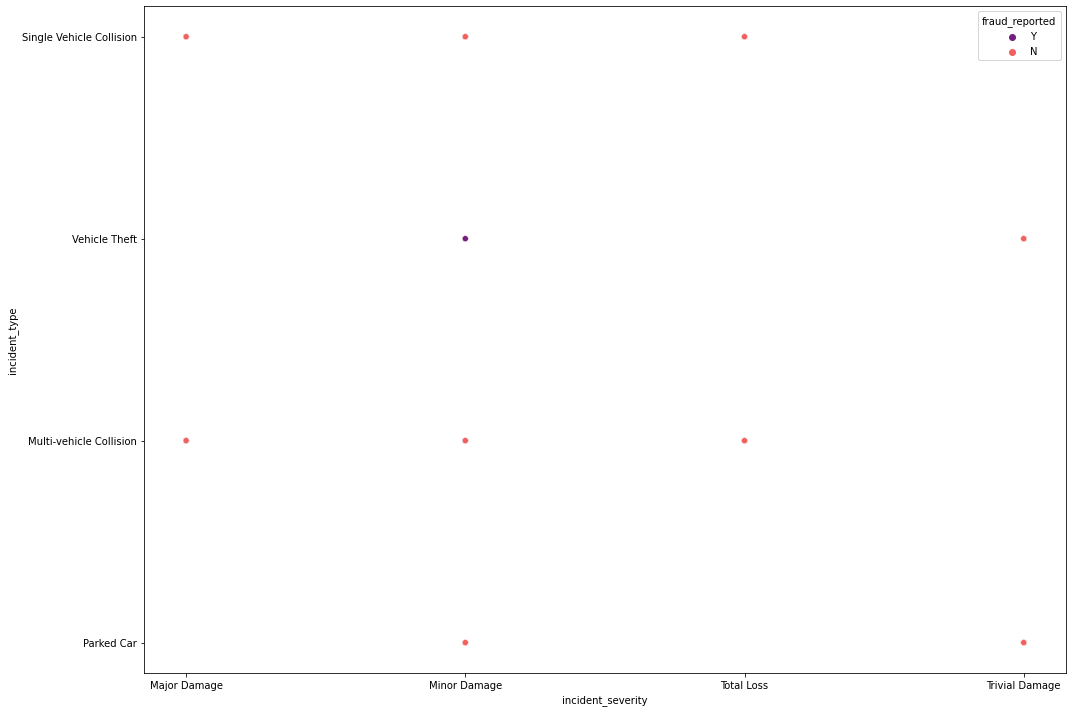

In [84]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['incident_severity'],y = df['incident_type'],hue=df['fraud_reported'],palette = 'magma')
plt.show()

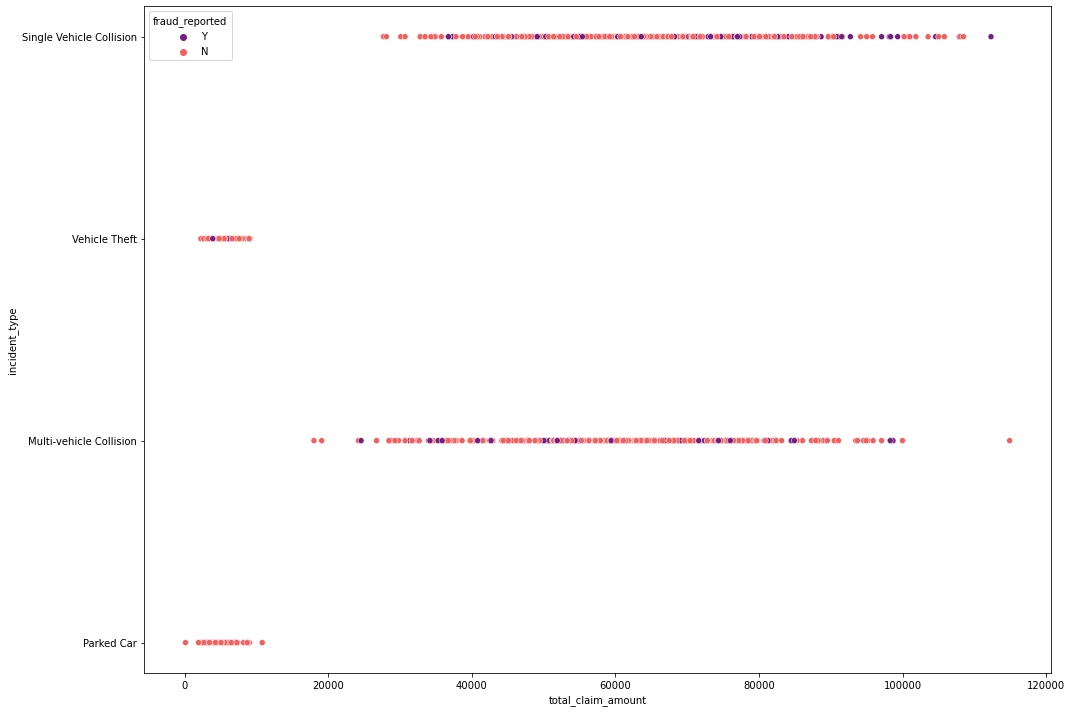

In [85]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['total_claim_amount'],y = df['incident_type'],hue=df['fraud_reported'],palette = 'magma')
plt.show()

In [ ]:
plt.figure(figsize= (20,20))
sns.pairplot(data= df)
plt.show()

## Encoding categorical data

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])

In [88]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_1,csl_2,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,1,2,17,10,2014,25,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,1,2,27,6,2006,21,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,0,1,9,6,2000,22,2
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,1,2,25,5,1990,1,10
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,2,0,6,6,2014,17,2


we can see category data is encoded to numeric

# Feature selection and Engineering

## 1. Outliers Detection and Removal

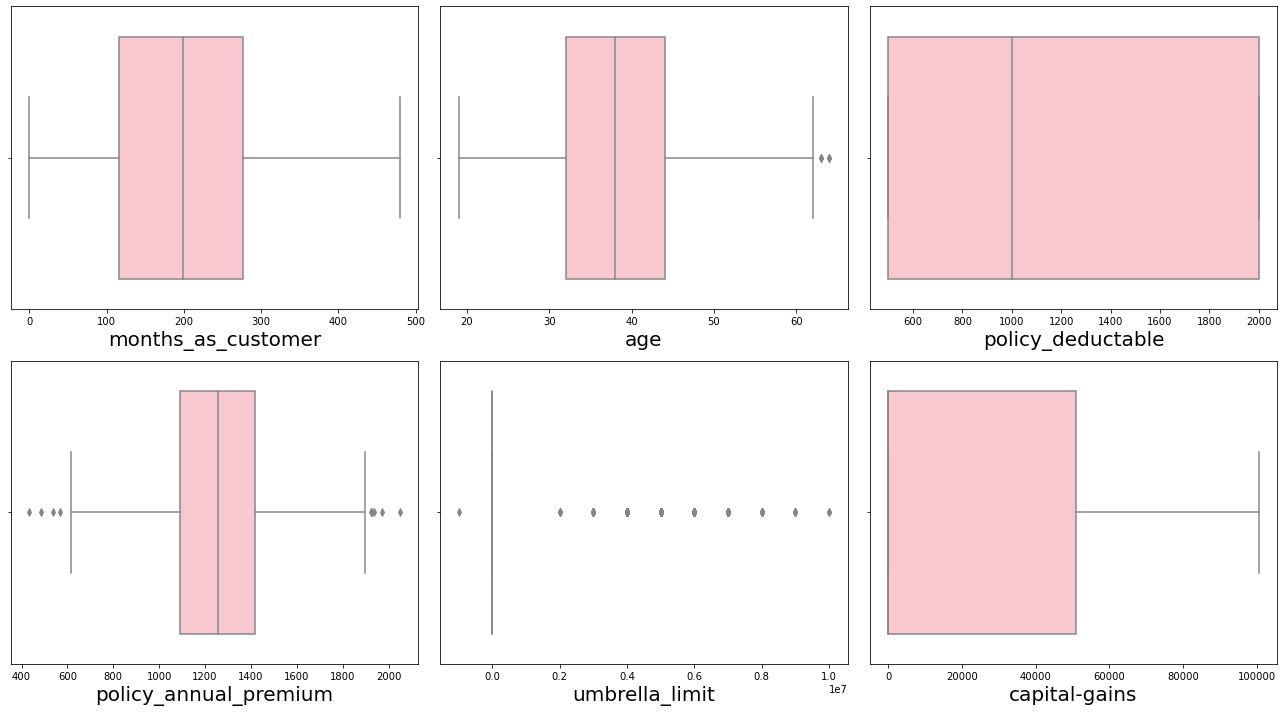

In [89]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Outliners are present

In [90]:
#using z-score
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [91]:
df.shape

(980, 40)

In [92]:
print('Percentage Data Loss :',((1000-980)/980)*100,'%')

Percentage Data Loss : 2.0408163265306123 %


Data loss is acceptable

## Detection and removal of Skewness

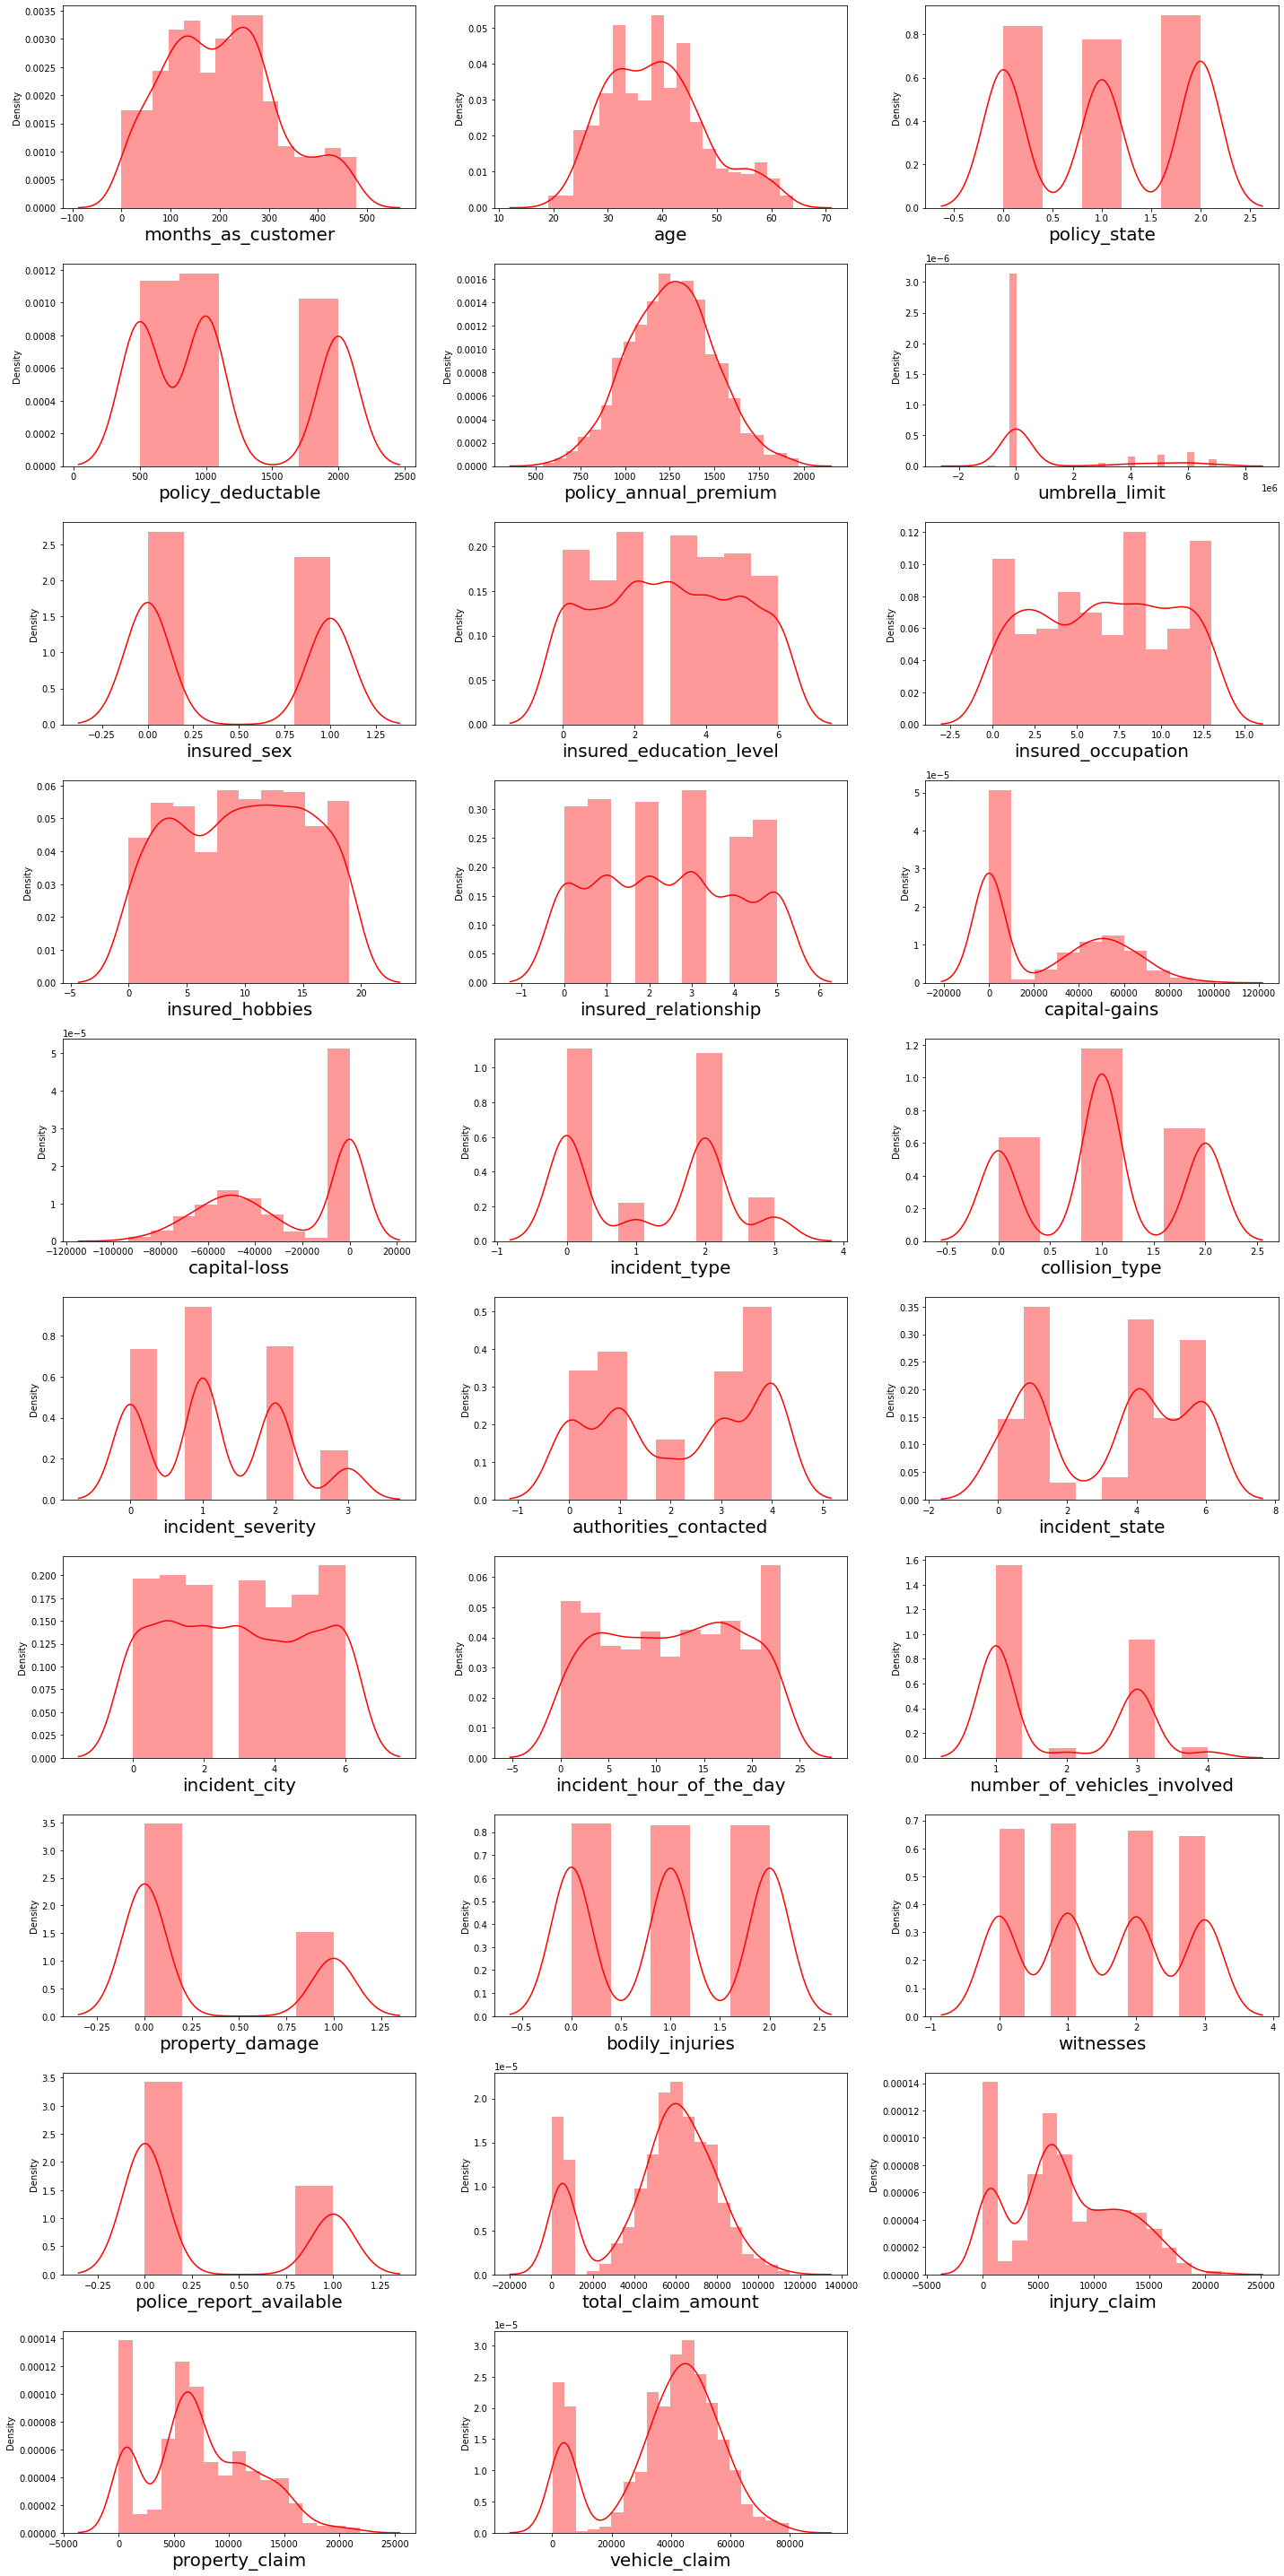

In [93]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [94]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


*skewness in target variable is avoided
*skewness can be avoided in categorical data

In [95]:
#removing skewness in discret columns
s=['total_claim_amount','vehicle_claim']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[s] = scaler.fit_transform(df[s].values)

## Detection and removal of Corrleation

In [96]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_1,csl_2,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,0.071492,0.007468,0.023041,-0.016746,-0.073031,-0.064094,0.013782,0.015811,-0.006601,0.066198,0.011831,-0.000630,-0.007674,0.063574,-0.017200,0.059338,0.065062,0.036660,0.056360,0.049734,0.005130,0.000869,0.021285,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,0.076129,-0.004529,0.012860,-0.026286,-0.076325,-0.064396,0.018441,0.012644,-0.006685,0.083720,0.020391,-0.008239,-0.012254,0.056360,-0.018135,0.068448,0.077149,0.062375,0.059129,0.033757,0.015322,0.005594,0.013279,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,-0.017060,0.068619,-0.031926,0.032373,0.049961,-0.028353,-0.014647,0.019456,-0.002809,0.021926,-0.045514,-0.013576,0.012097,0.025838,0.065316,-0.015056,-0.048188,-0.006420,-0.006411,0.010259,-0.018008,-0.001160,0.034587,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,-0.019000,0.031673,-0.019601,-0.032291,-0.055984,-0.016363,0.002769,0.000647,-0.047304,0.064732,0.046331,0.013074,-0.037263,0.071709,0.036275,0.024385,0.038459,0.071031,0.004874,-0.028032,-0.002591,0.030569,0.015774,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,0.004417,-0.006807,0.033133,0.051606,0.032604,-0.013911,-0.054425,0.048647,0.047771,-0.006448,-0.044544,0.076447,0.027837,0.003433,0.032413,-0.000944,-0.024119,-0.014073,0.009194,0.009311,-0.038226,-0.042446,-0.012686,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,0.095972,-0.022753,-0.025844,0.034951,0.008716,-0.001297,0.022396,-0.081479,0.039685,-0.022571,-0.041298,-0.083258,0.047719,-0.001363,-0.036754,-0.047400,-0.046298,-0.021380,-0.048842,0.012857,0.015360,0.027952,0.044729,0.013504,0.025418,-0.030416,-0.001072,0.049032,-0.031948,0.029210
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,0.004488,-0.019824,-0.030319,0.009540,-0.019044,-0.021242,0.019423,-0.022522,0.009957,0.012904,0.018852,0.032636,-0.015199,0.039343,0.014179,-0.016933,0.008472,-0.008744,-0.023597,0.019996,-0.018657,-0.033336,0.020582,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,-0.028673,0.044276,0.037070,0.005854,-0.022368,-0.010929,-0.015500,-0.007821,-0.022502,-0.053983,0.003279,-0.050922,-0.017959,0.021747,0.055785,0.079642,0.086600,0.062230,0.072650,0.060043,0.042735,0.054438,0.013116,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,-0.012135,0.000409,-0.016182,0.003755,0.012390,-0.000513,-0.000998,-0.020759,0.003112,-0.021657,-0.015647,-0.02

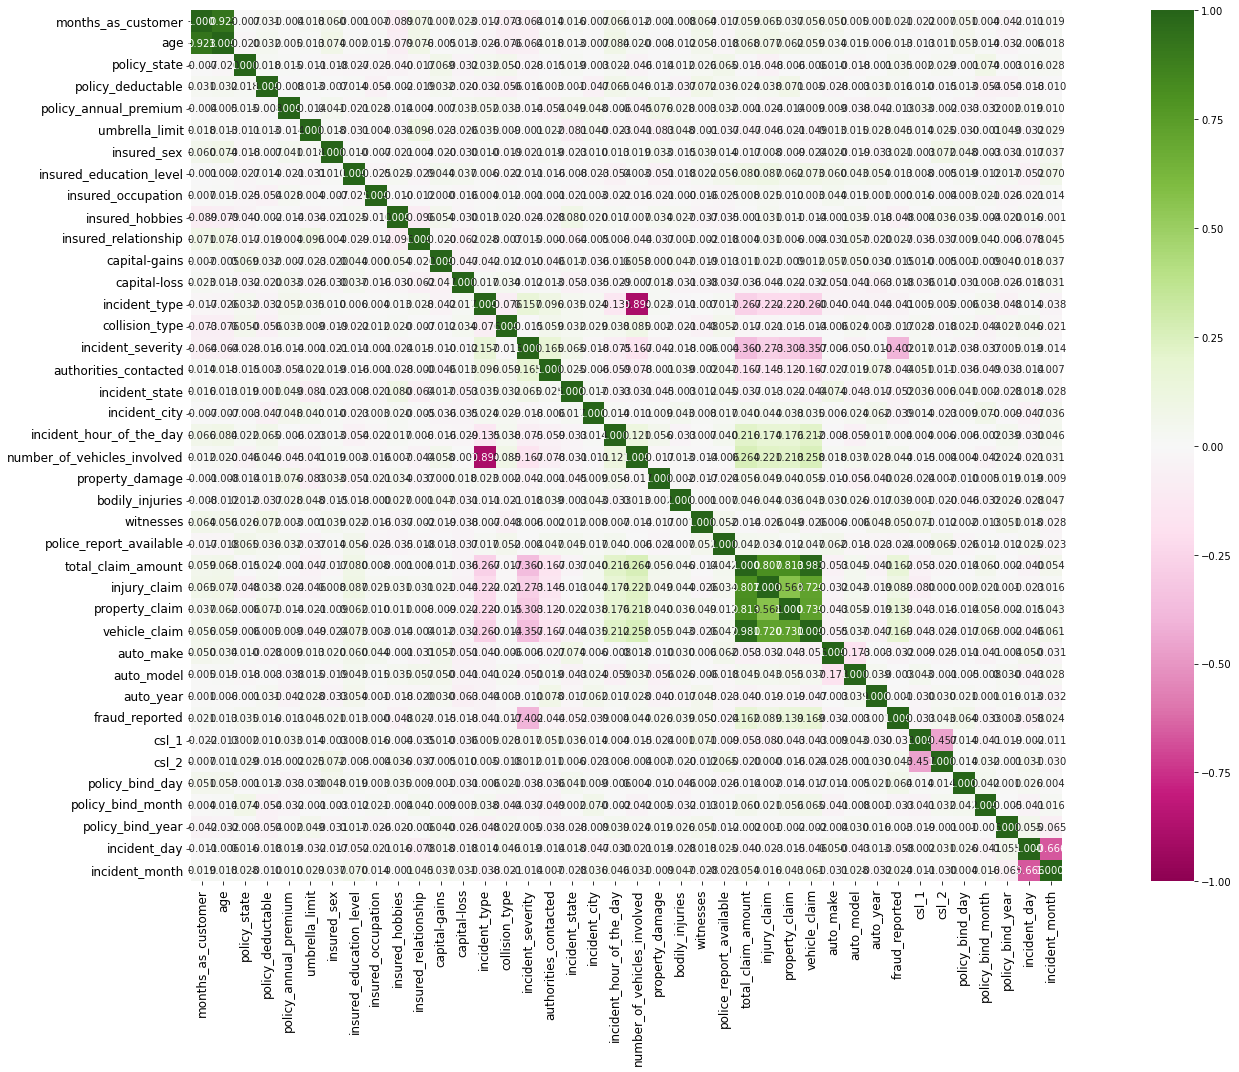

In [97]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="PiYG")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

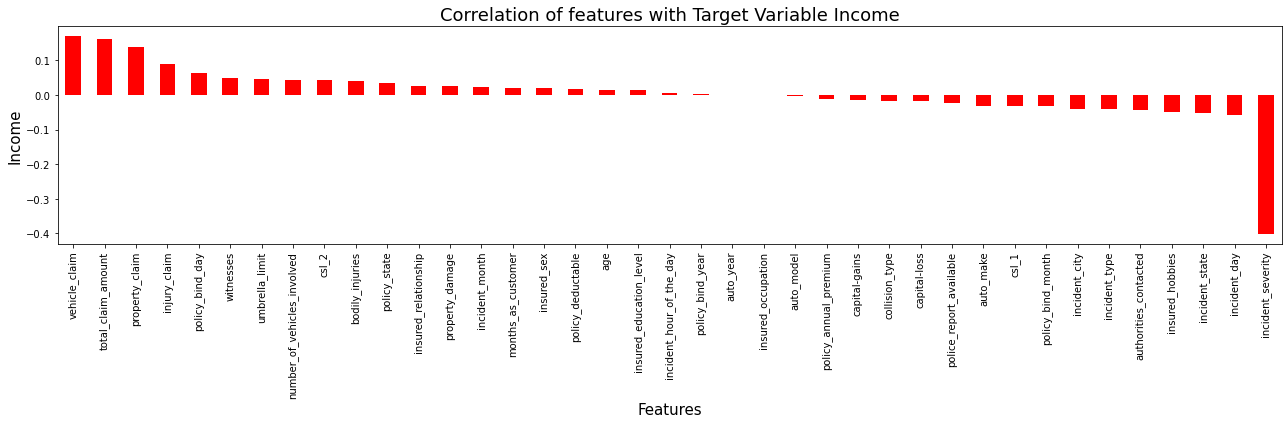

In [98]:
#correlation in barplot
plt.figure(figsize = (18,6))
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

### Detection multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,28.650839,months_as_customer
1,131.782075,age
2,2.608997,policy_state
3,4.683634,policy_deductable
4,29.187271,policy_annual_premium
5,1.273098,umbrella_limit
6,1.940037,insured_sex
7,3.448727,insured_education_level
8,3.800534,insured_occupation
9,4.139830,insured_hobbies


In [101]:
#checking if targer variable is balanced
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [103]:
#SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [104]:
s = SMOTE()
X, Y = s.fit_resample(X, Y)

In [105]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

<b>target variable is balanced</b>

## Scaling data

In [106]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

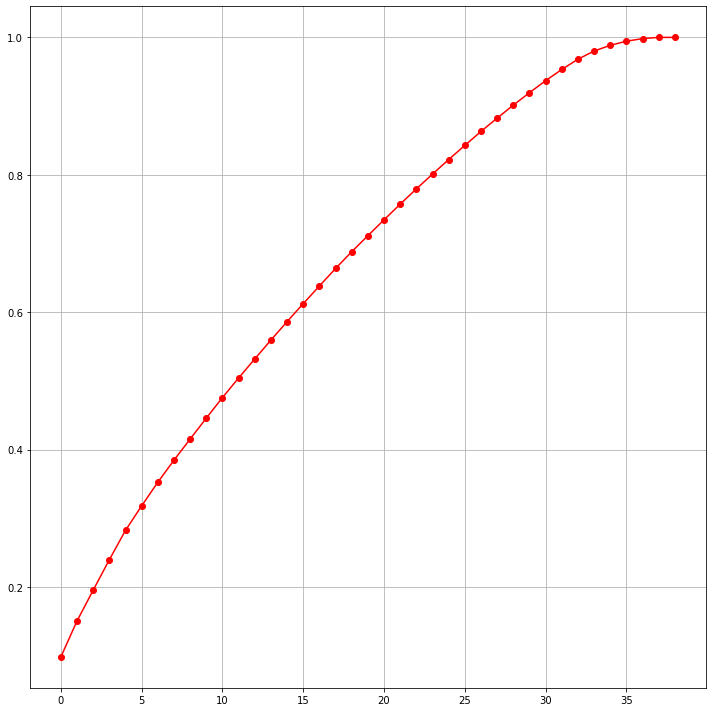

In [107]:
#apply pca
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [108]:
pca_new = PCA(n_components=30)
x_new = pca_new.fit_transform(X_scale)
x=pd.DataFrame(x_new,columns=np.arange(30))

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


# Classification Model

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=56, test_size=.3)

## Finding best random state

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8558558558558559 on Random_state 187


In [113]:
model=[
        LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print(accuracy_score(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test,y_pred))
    print('cv:',cross_val_score(m,X,Y,cv=3).mean())
    print('============================================================================================================')

0.8445945945945946
[[179  34]
 [ 35 196]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       213
           1       0.85      0.85      0.85       231

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444

cv: 0.5364824137109822
0.8716216216216216
[[192  21]
 [ 36 195]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       213
           1       0.90      0.84      0.87       231

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

cv: 0.5155346237336201
0.795045045045045
[[168  45]
 [ 46 185]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       213
           1       0.80      0.80      0.80       231

    accurac

## Hyper Parameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [116]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [117]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

## Final model

In [118]:
Final = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 100, max_depth=10 ,max_features='log2')
Final.fit(X_train,Y_train)
y_pred=Final.predict(X_test)
print( accuracy_score(Y_test, y_pred))

0.8918918918918919


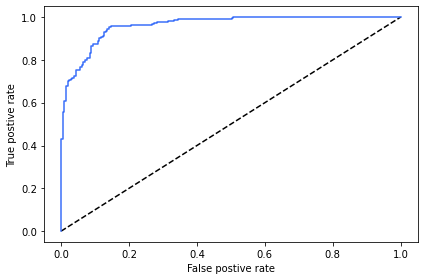

Auc Score :
 0.891713919882934


In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

<AxesSubplot:>

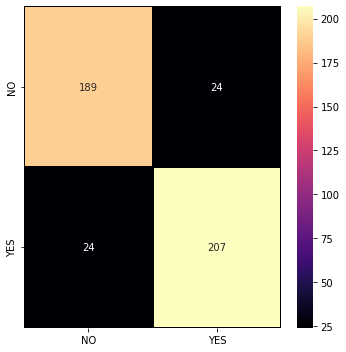

In [121]:
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="magma", xticklabels = x_labels, yticklabels = y_labels)


In [123]:
import joblib
joblib.dump(Final,'Insurance.pkl')

['Insurance.pkl']

## Final model prediction

In [125]:
# Prediction
prediction = Final.predict(X_test)

In [126]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,1,1
3,0,1
4,0,0
